### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve?
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

Our team's focus is on selling our data analysis and models to taxi companies and mobile transport companies such as Uber, Lyft. etc.

**1) Your business problem to solve:**

The first problem to solve is how can accurate ETAs improve customer experience? In general taxi companies do not have accurate ETA prediction models. If average taxis implemented models that could reliably predict ETA and price (based on the company's pricing), average taxi companies would be more enticing and customer friendly similar to competitors like Uber.

The second problem is to understand what areas have higher traffic concentration. This can help any taxi business or mobile transport company improve their route navigation and lower trip durations. Futhermore, this data can provide insights into traffic congestion areas, peak times, and popular routes. More analysis in this can show these companies where they should be increasing driver wages and compensation.

The third problem is to understand the need for specific vehicle capacities. Do people generally need high capacity vehicles? Or do high capacity vehicles get a lower number of trips? Understanding the needs of customers is key to intelligently investing in the right drivers and vehicles.

**2) Why the problem is important to solve?**

The Taxi Industry is failing and currently supports thousands of individuals with jobs and livelihoods, especially in urban environments. The fall of this industry could lead to plenty of these drivers losing their jobs and not being able to afford their own cars to transition to ride-sharing. Thus, it is important to utilize Taxi data and revitalize this industry, ensuring people continue to keep their jobs and transportation around cities is improved.

**3) What is your idea to solve the problem?**

To solve the first problem, we can build a model to predict trip duration based on features like pickup/dropoff locations, time of day, and day of the week. This can help companies provide more accurate ETAs and pricing, benefiting customer experience and fare calculation.

To solve the second poblem, we can create visual clusterings on pickup/dropoff locations to identify areas with concentrated demand for transport. This may be a part of our EDA.

The third problem can be solved through data analysis. We can also observe if larger vehciles are clustered around any specific areas.

**4) What differences you could make with your data science approach?**

Utilizing a data science approach and tools we can find insights into the data that many would not see or find on their own. These insights can help us determine specific times when taxis are most used, specific areas that are hot spots for transportation, and how many passengers an average ride may have. All of this information will allow us to make valuble and logical decisions for taxi companies.

**5) Why do you believe the idea deserves the financial resources of your company?**

Our work and research will not just help revitalize a single company, but an entire industry if applied properly. The taxi industry has been falling since the boom in ride-sharing apps, however, our team believes that with intelligent decision-making and the implementation of new modern ideas, we can bring the taxi industry back to the notoriety it once had decades ago.

### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_path = "train.csv"
df = pd.read_csv(df_path)
df.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:

# Check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

# size
df.size

# datatypes

df.dtypes


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Treating Null Values and Data Cleaning**

In [ ]:
import numpy as np

# Replace infinities with NaN across the entire DataFrame
df = df.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in any column
df = df.dropna(how='any')

# (Optional) Reset the index after cleaning
df = df.reset_index(drop=True)

print("All invalid or missing values have been cleaned from train_df!")

All invalid or missing values have been cleaned from train_df!


In [ ]:

# Two vendors or taxi companies present in this dataset
print(df['vendor_id'].value_counts())

vendor_id
2    780302
1    678342
Name: count, dtype: int64


**Anlaysis by Month**

Pickup/Dropoff Years:
pickup_datetime
2016    1458644
Name: count, dtype: int64
dropoff_datetime
2016    1458644
Name: count, dtype: int64 

Pickup/Dropoff Months:
pickup_datetime
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: count, dtype: int64
dropoff_datetime
1    229656
2    238292
3    256135
4    251636
5    248555
6    234243
7       127
Name: count, dtype: int64


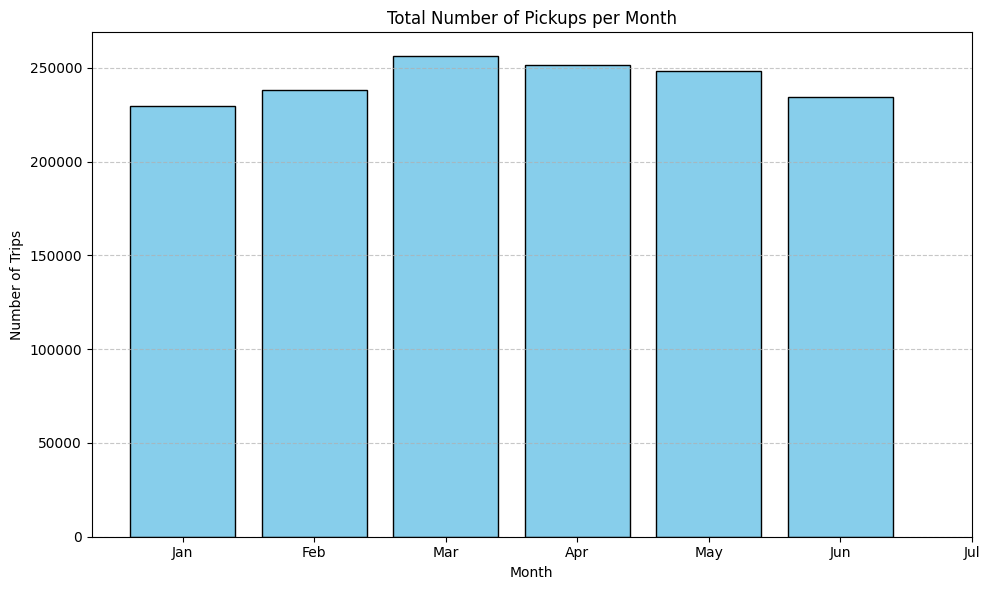

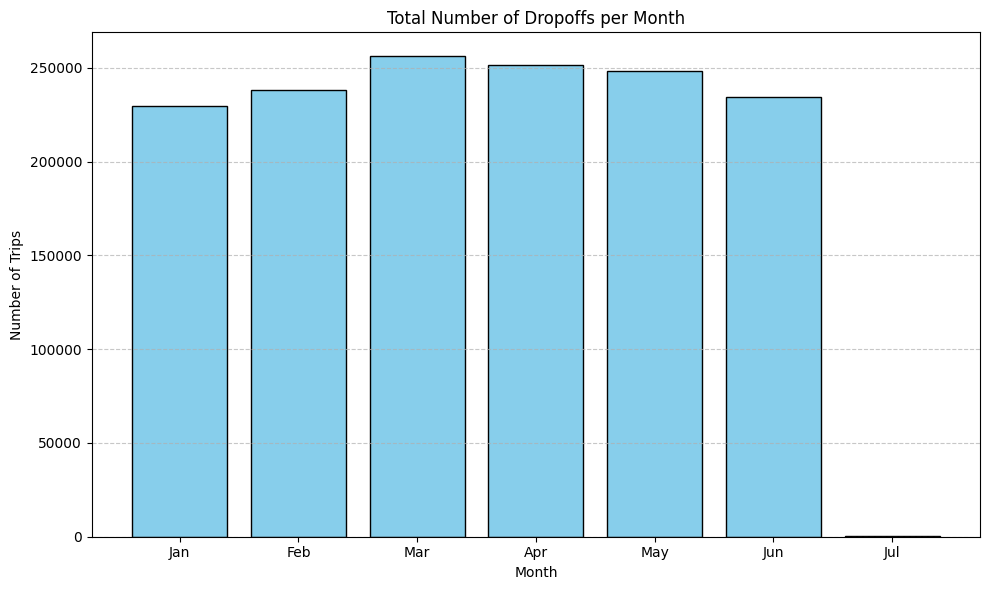

In [ ]:
'''
- All data is from year 2016
- Includes data from 7 months
Conjecture: The months of March and April tend to have the most taxi activity, likely due to the resumption of business operations and travel after winter.
The months of March and April had the highest number of pickups with 256189 and 251645 respectivley
'''
df_time = df.copy()

df_time['pickup_datetime'] = pd.to_datetime(df_time['pickup_datetime'])
df_time['dropoff_datetime'] = pd.to_datetime(df_time['dropoff_datetime'])

# Counting occurances of the year
year_count_pickup = df_time['pickup_datetime'].dt.year.value_counts()
year_count_dropoff = df_time['dropoff_datetime'].dt.year.value_counts()

print("Pickup/Dropoff Years:")
print(year_count_pickup)
print(year_count_dropoff, "\n")

# Counting occurances of the month
month_count_pickup = df_time['pickup_datetime'].dt.month.value_counts().sort_index()
month_count_dropoff = df_time['dropoff_datetime'].dropna().dt.month.astype(int).value_counts().sort_index()

print('Pickup/Dropoff Months:')
print(month_count_pickup)
print(month_count_dropoff)


monthly_trip_counts_pickup = df_time['pickup_datetime'].dt.month.value_counts().sort_index()

# Plot count of pickup dates by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_trip_counts_pickup.index, monthly_trip_counts_pickup.values, color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Total Number of Pickups per Month')
plt.xticks(range(1, 8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


monthly_trip_counts_dropoff = df_time['dropoff_datetime'].dt.month.value_counts().sort_index()

# Plot count of dropoff dates by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_trip_counts_dropoff.index, monthly_trip_counts_dropoff.values, color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Total Number of Dropoffs per Month')
plt.xticks(range(1, 8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Hourly Analysis by Day of the Week**

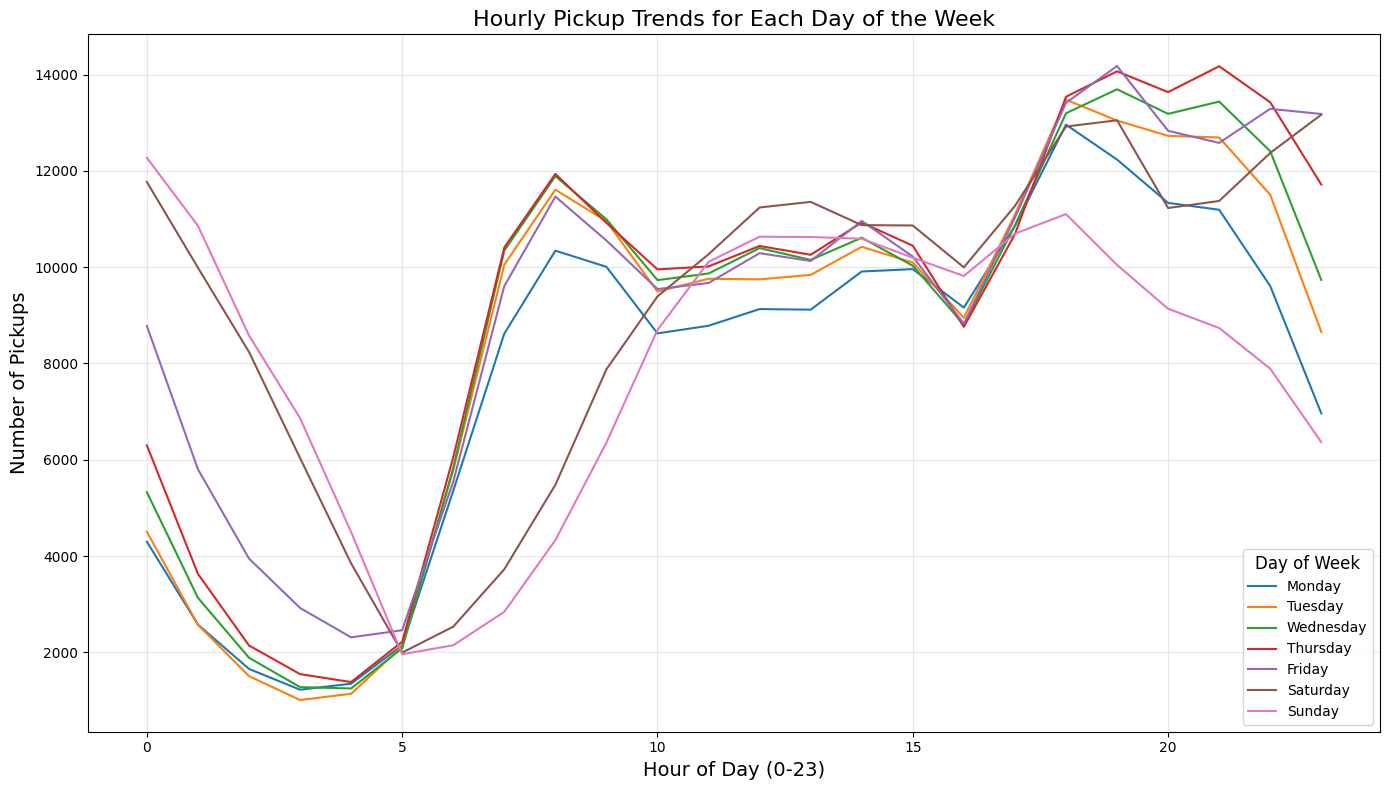

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_time = df.copy()

# Ensure pickup_datetime is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df_time['pickup_datetime']):
    df_time['pickup_datetime'] = pd.to_datetime(df_time['pickup_datetime'])

# Extract hour and day of the week
df_time['hour'] = df_time['pickup_datetime'].dt.hour
df_time['day_of_week'] = df_time['pickup_datetime'].dt.day_name()

# Aggregate hourly pickups for each day
hourly_pickups = df_time.groupby(['day_of_week', 'hour']).size().reset_index(name='pickup_count')

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_pickups['day_of_week'] = pd.Categorical(hourly_pickups['day_of_week'], categories=day_order, ordered=True)

# Plot hourly trends
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=hourly_pickups,
    x='hour', y='pickup_count', hue='day_of_week', palette='tab10'
)

# Add titles and labels
plt.title('Hourly Pickup Trends for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.legend(title='Day of Week', title_fontsize=12, fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Average Hourly Analysis of the Day**

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\465830053.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




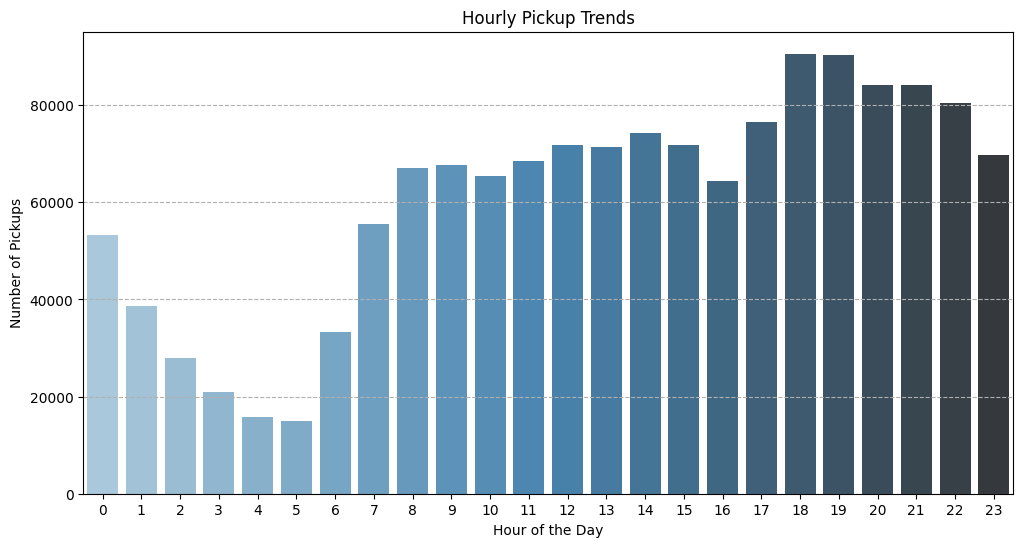

In [ ]:
# Ensure pickup_datetime is a datetime object
df_time = df.copy()
df_time['pickup_datetime'] = pd.to_datetime(df_time['pickup_datetime'], errors='coerce')

# Step 1: Extract Time Information
df_time['hour'] = df_time['pickup_datetime'].dt.hour
df_time['day_of_week'] = df_time['pickup_datetime'].dt.day_name()
df_time['month'] = df_time['pickup_datetime'].dt.month

# Step 2: Group and Aggregate
hourly_pickups = df_time.groupby('hour').size().reset_index(name='pickup_count')
daily_pickups = df_time.groupby('day_of_week').size().reset_index(name='pickup_count')
monthly_pickups = df_time.groupby('month').size().reset_index(name='pickup_count')

# Step 3: Visualize Patterns

# Hourly Pickup Trends
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='pickup_count', data=hourly_pickups, palette='Blues_d')
plt.title('Hourly Pickup Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()


**10 most busy pickup spots**

In [ ]:
import pandas as pd
import folium
from math import floor

# Define NYC bounds
LAT_MIN, LAT_MAX = 40.5, 41.0
LON_MIN, LON_MAX = -74.25, -73.75

# Approximate 1-degree latitude/longitude to kilometers
LAT_KM = 110.574  # 1 degree latitude ~ 110.574 km
LON_KM = 111.320  # 1 degree longitude ~ 111.320*cos(latitude)

# Function to assign a cell based on coordinates
def assign_cell(lat, lon, lat_min, lon_min, cell_size_km):
    # Convert lat/lon to relative km grid
    lat_cell = floor((lat - lat_min) * LAT_KM / cell_size_km)
    lon_cell = floor((lon - lon_min) * (LON_KM * abs(lat)) / cell_size_km)
    return (lat_cell, lon_cell)

# Filter for NYC bounds and create grid cells
df_busy = df[
    (df['pickup_latitude'] >= LAT_MIN) & (df['pickup_latitude'] <= LAT_MAX) &
    (df['pickup_longitude'] >= LON_MIN) & (df['pickup_longitude'] <= LON_MAX)
]
df_busy['cell'] = df_busy.apply(
    lambda row: assign_cell(
        row['pickup_latitude'], row['pickup_longitude'], LAT_MIN, LON_MIN, cell_size_km=1
    ),
    axis=1
)

# Count pickups per cell
cell_counts = df_busy.groupby('cell').size().reset_index(name='pickup_count')

# Get the top 10 cells by pickup count
top_cells = cell_counts.nlargest(10, 'pickup_count')

# Compute the centroid of each top cell
def cell_to_lat_lon(cell, lat_min, lon_min, cell_size_km):
    lat_cell, lon_cell = cell
    lat_center = lat_min + (lat_cell + 0.5) * cell_size_km / LAT_KM
    lon_center = lon_min + (lon_cell + 0.5) * cell_size_km / (LON_KM * abs(lat_center))
    return lat_center, lon_center

top_cells['lat_lon'] = top_cells['cell'].apply(
    lambda cell: cell_to_lat_lon(cell, LAT_MIN, LON_MIN, cell_size_km=1)
)

# Initialize the map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add the top 10 cells to the map as circles
for _, row in top_cells.iterrows():
    lat, lon = row['lat_lon']
    folium.CircleMarker(
        location=(lat, lon),
        radius=15,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"Cell {row['cell']}<br>Pickups: {row['pickup_count']}"
    ).add_to(nyc_map)

# Save map to HTML
output_file = "nyc_top_cells.html"
nyc_map.save(output_file)

print(f"Map with top 10 hotspot cells saved to {output_file}. Open it in your browser!")

# Output will be found in nyc_top_cells.html

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\4031954369.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Map with top 10 hotspot cells saved to nyc_top_cells.html. Open it in your browser!


**Hotspots days of the week**

In [ ]:
import pandas as pd
import folium
from math import floor

# Define NYC bounds
LAT_MIN, LAT_MAX = 40.5, 41.0
LON_MIN, LON_MAX = -74.25, -73.75

# Approximate 1-degree latitude/longitude to kilometers
LAT_KM = 110.574  # 1 degree latitude ~ 110.574 km
LON_KM = 111.320  # 1 degree longitude ~ 111.320*cos(latitude)

# Function to assign a cell based on coordinates
def assign_cell(lat, lon, lat_min, lon_min, cell_size_km):
    lat_cell = floor((lat - lat_min) * LAT_KM / cell_size_km)
    lon_cell = floor((lon - lon_min) * (LON_KM * abs(lat)) / cell_size_km)
    return (lat_cell, lon_cell)

# Filter data within NYC bounds and add a 'day_of_week' column
df_hotspots = df[
    (df['pickup_latitude'] >= LAT_MIN) & (df['pickup_latitude'] <= LAT_MAX) &
    (df['pickup_longitude'] >= LON_MIN) & (df['pickup_longitude'] <= LON_MAX)
]
df_hotspots['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])  # Assuming this column exists
df_hotspots['day_of_week'] = df_hotspots['pickup_datetime'].dt.day_name()  # Get the day of the week

# Assign grid cells for each pickup
df_hotspots['cell'] = df_hotspots.apply(
    lambda row: assign_cell(
        row['pickup_latitude'], row['pickup_longitude'], LAT_MIN, LON_MIN, cell_size_km=1
    ),
    axis=1
)

# Function to compute the centroid of a cell
def cell_to_lat_lon(cell, lat_min, lon_min, cell_size_km):
    lat_cell, lon_cell = cell
    lat_center = lat_min + (lat_cell + 0.5) * cell_size_km / LAT_KM
    lon_center = lon_min + (lon_cell + 0.5) * cell_size_km / (LON_KM * abs(lat_center))
    return lat_center, lon_center


C:\Users\karis\AppData\Local\Temp\ipykernel_28104\683971103.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\683971103.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\683971103.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
# Create a map for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    # Filter data for the specific day
    day_df = df_hotspots[df_hotspots['day_of_week'] == day]

    # Count pickups per cell for this day
    cell_counts = day_df.groupby('cell').size().reset_index(name='pickup_count')

    # Get the top 10 cells by pickup count
    top_cells = cell_counts.nlargest(10, 'pickup_count')

    # Compute the centroid of each top cell
    top_cells['lat_lon'] = top_cells['cell'].apply(
        lambda cell: cell_to_lat_lon(cell, LAT_MIN, LON_MIN, cell_size_km=1)
    )

    # Initialize the map for the current day
    day_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

    # Add the top 10 cells to the map as circles
    for _, row in top_cells.iterrows():
        lat, lon = row['lat_lon']
        folium.CircleMarker(
            location=(lat, lon),
            radius=15,
            color='red',
            fill=True,
            fill_opacity=0.6,
            popup=f"Cell {row['cell']}<br>Pickups: {row['pickup_count']}"
        ).add_to(day_map)

    # Save the map to an HTML file
    output_file = f"nyc_top_cells_{day.lower()}.html"
    day_map.save(output_file)
    print(f"Map for {day} with top 10 hotspot cells saved to {output_file}. Open it in your browser!")


Map for Monday with top 10 hotspot cells saved to nyc_top_cells_monday.html. Open it in your browser!
Map for Tuesday with top 10 hotspot cells saved to nyc_top_cells_tuesday.html. Open it in your browser!
Map for Wednesday with top 10 hotspot cells saved to nyc_top_cells_wednesday.html. Open it in your browser!
Map for Thursday with top 10 hotspot cells saved to nyc_top_cells_thursday.html. Open it in your browser!
Map for Friday with top 10 hotspot cells saved to nyc_top_cells_friday.html. Open it in your browser!
Map for Saturday with top 10 hotspot cells saved to nyc_top_cells_saturday.html. Open it in your browser!
Map for Sunday with top 10 hotspot cells saved to nyc_top_cells_sunday.html. Open it in your browser!


**Heat Map of Popular Routes**

Filtered Data for Outliers or Incorrect Lat and Longitute


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from collections import Counter

# Assuming train_df is your dataset with pickup and dropoff coordinates
# Filter for valid latitudes and longitudes
df_filtered = df[
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90) &
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180) &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90) &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
]

# Filter for coordinates within the region of interest (e.g., NYC area)
# You can adjust this bounding box based on your region of interest
df_filtered = df[
    (df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 41) &
    (df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.75) &
    (df['dropoff_latitude'] >= 40.5) & (df['dropoff_latitude'] <= 41) &
    (df['dropoff_longitude'] >= -74.25) & (df['dropoff_longitude'] <= -73.75)
]

# Step 1: Extract pickup and dropoff coordinates as tuples
df_filtered['route'] = list(zip(df_filtered['pickup_latitude'], df['pickup_longitude'],
                             df_filtered['dropoff_latitude'], df['dropoff_longitude']))

# Step 2: Count the frequency of each route
route_counts = Counter(df_filtered['route'])

# Step 3: Find the top 10 most popular routes (adjust the number as needed)
top_routes = route_counts.most_common(10)

# Step 4: Visualize the top routes on a map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add popular routes to the map
for route, count in top_routes:
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = route
    folium.PolyLine(
        locations=[(pickup_lat, pickup_lon), (dropoff_lat, dropoff_lon)],
        color='blue', weight=5, opacity=0.6
    ).add_to(nyc_map)

# Add heatmap for pickups (optional)
heat_data = [[row['pickup_latitude'], row['pickup_longitude']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(nyc_map)

# Save the map to HTML
output_file = "nyc_popular_routes_filtered.html"
nyc_map.save(output_file)
print(f"Map with popular routes saved to {output_file}. Open it in your browser!")

# Can be observed in in nyc_popular_routes_filtered.html

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\798206377.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Map with popular routes saved to nyc_popular_routes_filtered.html. Open it in your browser!


**Clusteing Based on Trip Duration and Number of Passengers**

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Temporal Analysis**

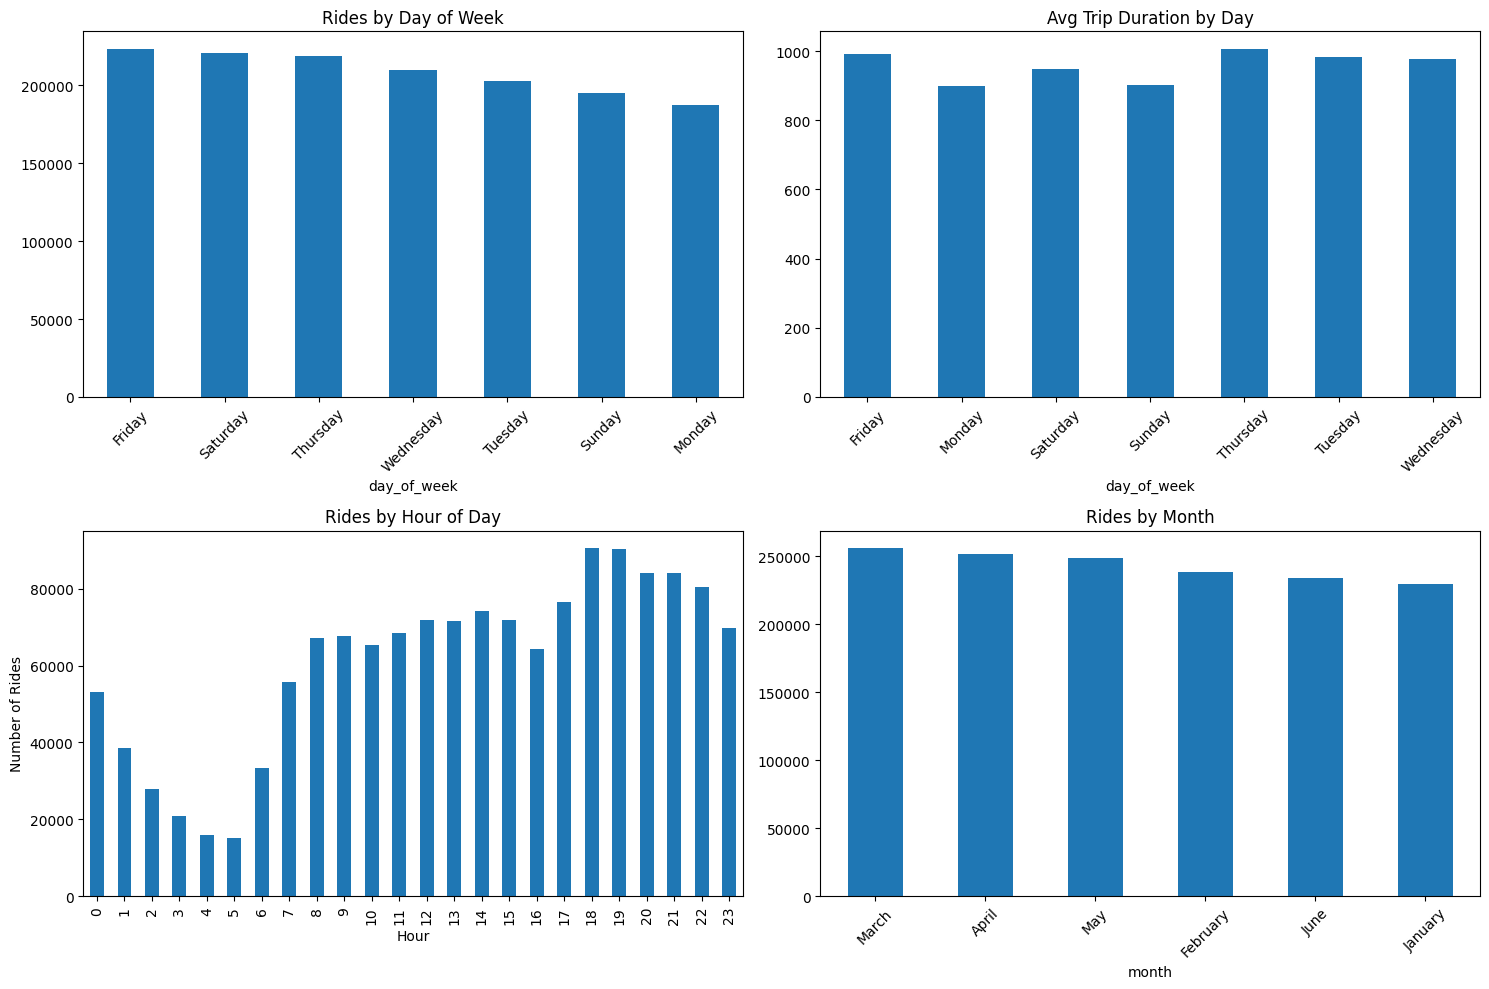

In [ ]:
def temporal_analysis(total_df):
    """Comprehensive temporal analysis of taxi rides."""
    total_df['pickup_datetime'] = pd.to_datetime(total_df['pickup_datetime'])

    plt.figure(figsize=(15, 10))

    # Rides by Day of Week
    plt.subplot(2, 2, 1)
    total_df['day_of_week'] = total_df['pickup_datetime'].dt.day_name()
    day_counts = total_df['day_of_week'].value_counts()
    day_counts.plot(kind='bar')
    plt.title('Rides by Day of Week')
    plt.xticks(rotation=45)

    # Average Trip Duration by Day of Week
    plt.subplot(2, 2, 2)
    avg_duration_by_day = total_df.groupby('day_of_week')['trip_duration'].mean()
    avg_duration_by_day.plot(kind='bar')
    plt.title('Avg Trip Duration by Day')
    plt.xticks(rotation=45)

    # Hourly Ride Distribution
    plt.subplot(2, 2, 3)
    total_df['hour'] = total_df['pickup_datetime'].dt.hour
    hourly_counts = total_df['hour'].value_counts().sort_index()
    hourly_counts.plot(kind='bar')
    plt.title('Rides by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Rides')

    # Monthly Ride Distribution
    plt.subplot(2, 2, 4)
    total_df['month'] = total_df['pickup_datetime'].dt.month_name()
    monthly_counts = total_df['month'].value_counts()
    monthly_counts.plot(kind='bar')
    plt.title('Rides by Month')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

temporal_analysis(df)

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below**

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


**Trip Duration Prediction Model**

In [ ]:
'''
Conjecture:
The duration of a taxi trip is primarily influenced by temporal, spatial, and trip-specific factors, which interact in predictable ways to determine trip outcomes. By leveraging a combination of geospatial coordinates, temporal features, and passenger data, a machine learning model can learn to accurately predict trip duration, even in the presence of natural variability and noise in the dataset
'''

'\nConjecture:\nThe duration of a taxi trip is primarily influenced by temporal, spatial, and trip-specific factors, which interact in predictable ways to determine trip outcomes. By leveraging a combination of geospatial coordinates, temporal features, and passenger data, a machine learning model can learn to accurately predict trip duration, even in the presence of natural variability and noise in the dataset\n'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

if torch.cuda.is_available():
   dev = "cuda:0"
else:
   dev = "cpu"
device = torch.device(dev)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=50)

In [ ]:
# Preprocessing and Feature Engineering
'''
Features: pickup_month, pickup_hour, pickup_dayofweek, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
Label: trip_duration
'''

def preprocessData(data):
   # Create hour and day of week columns for pickup
   data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
   data['pickup_hour'] = data['pickup_datetime'].dt.hour
   data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
   data['pickup_month'] = data['pickup_datetime'].dt.month

   # Removing outliers
   data = data[data['trip_duration'] <= (np.mean(data['trip_duration']) + 2 * np.std(data['trip_duration']))]
   data = data[data['trip_duration'] >= (np.mean(data['trip_duration']) - 2 * np.std(data['trip_duration']))]


   data = data[
   (data['pickup_latitude'] >= -90) & (data['pickup_latitude'] <= 90) &
   (data['pickup_longitude'] >= -180) & (data['pickup_longitude'] <= 180) &
   (data['dropoff_latitude'] >= -90) & (data['dropoff_latitude'] <= 90) &
   (data['dropoff_longitude'] >= -180) & (data['dropoff_longitude'] <= 180)
]

   # Filter for coordinates within the region of interest (e.g., NYC area)
   # You can adjust this bounding box based on your region of interest
   data = data[
      (data['pickup_latitude'] >= 40.5) & (data['pickup_latitude'] <= 41) &
      (data['pickup_longitude'] >= -74.25) & (data['pickup_longitude'] <= -73.75) &
      (data['dropoff_latitude'] >= 40.5) & (data['dropoff_latitude'] <= 41) &
      (data['dropoff_longitude'] >= -74.25) & (data['dropoff_longitude'] <= -73.75)
   ]

   # Features
   training_features = data[['pickup_hour', 'pickup_dayofweek', 'pickup_month',
                          'pickup_latitude', 'pickup_longitude', 'passenger_count',
                          'dropoff_latitude', 'dropoff_longitude']]

   # Labels
   data['log_trip_duration'] = np.log1p(data['trip_duration'])
   training_labels = data[['log_trip_duration']]

   # Normalizing data
   scaler = StandardScaler()
   scaler_features = scaler.fit(training_features)
   scaler_labels = scaler.fit(training_labels)

   scaled_features = scaler_features.fit_transform(training_features)
   scaled_labels = scaler_labels.fit_transform(training_labels.values.reshape(-1, 1))  # Ensure labels are 2D for scaling

   # Convert to PyTorch tensors
   training_features = torch.tensor(scaled_features, dtype=torch.float32)
   training_labels = torch.tensor(scaled_labels, dtype=torch.float32)

   training_features = training_features.to(dev)
   training_labels = training_labels.to(dev)

   return training_features, training_labels

In [ ]:
def r2_score(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    ss_total = torch.sum((y_true - y_true_mean) ** 2)
    ss_residual = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / (ss_total + 1e-7))  # Add small epsilon to avoid division by zero
    return r2

In [ ]:
# Define Time Duration Model Class
class TimeDurationModel(nn.Module):
   def __init__(self, input_dim, num_hidden1, num_hidden2, num_hidden3, dropout_rate):
      super(TimeDurationModel, self).__init__()
      self.fc1 = nn.Linear(input_dim, num_hidden1) # Must take in dimentions of X_features to know shape of data
      self.bn1 = nn.BatchNorm1d(num_hidden1)
      self.fc2 = nn.Linear(num_hidden1, num_hidden2)
      self.bn2 = nn.BatchNorm1d(num_hidden2)
      self.fc3 = nn.Linear(num_hidden2, num_hidden3)
      self.bn3 = nn.BatchNorm1d(num_hidden3)
      self.fc4 = nn.Linear(num_hidden3, 1)
      self.dropout = nn.Dropout(dropout_rate)

   def forward(self, x):
      x = torch.relu(self.bn1(self.fc1(x)))
      x = self.dropout(x)
      x = torch.relu(self.bn2(self.fc2(x)))
      x = self.dropout(x)
      x = torch.relu(self.bn3(self.fc3(x)))
      x = self.fc4(x)
      return x

   def train_model(self, train_features, train_labels, num_epochs, batch_size, learning_rate):
      train_dataset = TensorDataset(train_features, train_labels)
      data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size)

      loss_fnc = nn.MSELoss()
      optimizer = optim.Adam(self.parameters(), lr=learning_rate) # 0.0001 seems to work well

      epochs = num_epochs
      for epoch in tqdm(range(epochs)):
         self.train()
         total_loss = 0
         total_r2 = 0
         batch_count = 0

         for batch_features, batch_labels in data_loader:
            batch_features.to(dev)
            batch_labels.to(dev)

            optimizer.zero_grad()
            predictions = self.forward(batch_features)

            batch_loss = loss_fnc(predictions, batch_labels)
            total_loss += batch_loss.item()

            batch_r2 = r2_score(batch_labels, predictions)
            total_r2 += batch_r2


            batch_loss.backward()
            optimizer.step()
            batch_count += 1

         avg_loss = total_loss / batch_count
         avg_r2 = total_r2 / batch_count

         print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}, R²: {avg_r2:.4f}")

   def evaluate_model(self, test_features, test_labels, batch_size):
      self.eval()  # Set model to evaluation mode
      eval_dataset = TensorDataset(test_features, test_labels)
      eval_loader = DataLoader(dataset=eval_dataset, batch_size=batch_size)

      loss_fnc = nn.MSELoss()
      total_loss = 0
      total_r2 = 0
      batch_count = 0

      with torch.no_grad():  # Disable gradient computation
         for batch_features, batch_labels in eval_loader:
            batch_features = batch_features.to(dev)
            batch_labels = batch_labels.to(dev)

            # Forward pass
            predictions = self(batch_features)

            # Compute Loss
            batch_loss = loss_fnc(predictions, batch_labels)
            total_loss += batch_loss.item()

            # Compute R²
            batch_r2 = r2_score(batch_labels, predictions)
            total_r2 += batch_r2.item()

            batch_count += 1

      avg_loss = total_loss / batch_count
      avg_r2 = total_r2 / batch_count

      print(f"Evaluation Results - Loss: {avg_loss:.4f}, R²: {avg_r2:.4f}")
      return avg_loss, avg_r2

In [ ]:
import optuna
from optuna.samplers import TPESampler


# Define the objective function
def objective(trial):
# Suggest hyperparameters
   num_hidden1 = trial.suggest_int("num_hidden1", 32, 128)
   num_hidden2 = trial.suggest_int("num_hidden2", 16, 64)
   num_hidden3 = trial.suggest_int("num_hidden3", 8, 32)
   dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.2)

   learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
   batch_size = trial.suggest_int("batch_size", 128, 1024, step=128)
   num_epochs = 10

   train_features, train_labels = preprocessData(train_data) # Run preprocessing train data

   # Initialize the model
   input_dim = train_features.shape[1]
   model = TimeDurationModel(input_dim, num_hidden1, num_hidden2, num_hidden3, dropout_rate).to(dev)

   # Train the model using the existing method
   model.train_model(train_features, train_labels, num_epochs=num_epochs, batch_size=batch_size, learning_rate=learning_rate)

   test_features, test_labels = preprocessData(test_data) # Run preprocessing test data

   # Evaluate the model
   avg_loss, avg_r2 = model.evaluate_model(test_features, test_labels, batch_size=batch_size)

   # Optuna maximizes the objective, so return avg_r2
   return avg_r2  # Maximizing R²


In [ ]:
# Create an Optuna study
study = optuna.create_study(direction="maximize", sampler=TPESampler())
study.optimize(objective, n_trials=50)  # Perform 50 trials

# Print the best trial
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

[I 2024-12-03 03:27:26,898] A new study created in memory with name: no-name-ecb7fffc-ada7-4e1f-aaf2-e51b4c575277
 10%|█         | 1/10 [00:27<04:06, 27.38s/it]

Epoch 1/10, Loss: 0.5896, R²: 0.4103


 20%|██        | 2/10 [00:52<03:29, 26.15s/it]

Epoch 2/10, Loss: 0.4008, R²: 0.5992


 30%|███       | 3/10 [01:18<03:00, 25.85s/it]

Epoch 3/10, Loss: 0.3613, R²: 0.6386


 40%|████      | 4/10 [01:44<02:36, 26.00s/it]

Epoch 4/10, Loss: 0.3421, R²: 0.6578


 50%|█████     | 5/10 [02:10<02:10, 26.12s/it]

Epoch 5/10, Loss: 0.3299, R²: 0.6700


 60%|██████    | 6/10 [02:38<01:46, 26.51s/it]

Epoch 6/10, Loss: 0.3211, R²: 0.6788


 70%|███████   | 7/10 [03:03<01:18, 26.20s/it]

Epoch 7/10, Loss: 0.3148, R²: 0.6850


 80%|████████  | 8/10 [03:29<00:52, 26.03s/it]

Epoch 8/10, Loss: 0.3102, R²: 0.6897


 90%|█████████ | 9/10 [03:55<00:26, 26.16s/it]

Epoch 9/10, Loss: 0.3061, R²: 0.6938


100%|██████████| 10/10 [04:22<00:00, 26.20s/it]

Epoch 10/10, Loss: 0.3034, R²: 0.6964



[I 2024-12-03 03:31:57,304] Trial 0 finished with value: 0.7220867832921111 and parameters: {'num_hidden1': 96, 'num_hidden2': 57, 'num_hidden3': 28, 'dropout_rate': 0.17765292050843423, 'learning_rate': 0.00011253365415690604, 'batch_size': 768}. Best is trial 0 with value: 0.7220867832921111.


Evaluation Results - Loss: 0.2777, R²: 0.7221


 10%|█         | 1/10 [00:26<03:54, 26.09s/it]

Epoch 1/10, Loss: 0.5260, R²: 0.4737


 20%|██        | 2/10 [00:53<03:32, 26.58s/it]

Epoch 2/10, Loss: 0.3527, R²: 0.6472


 30%|███       | 3/10 [01:18<03:01, 25.90s/it]

Epoch 3/10, Loss: 0.3287, R²: 0.6711


 40%|████      | 4/10 [01:43<02:33, 25.60s/it]

Epoch 4/10, Loss: 0.3161, R²: 0.6837


 50%|█████     | 5/10 [02:09<02:08, 25.80s/it]

Epoch 5/10, Loss: 0.3092, R²: 0.6906


 60%|██████    | 6/10 [02:35<01:43, 25.97s/it]

Epoch 6/10, Loss: 0.3047, R²: 0.6952


 70%|███████   | 7/10 [03:02<01:19, 26.39s/it]

Epoch 7/10, Loss: 0.3010, R²: 0.6988


 80%|████████  | 8/10 [03:28<00:52, 26.11s/it]

Epoch 8/10, Loss: 0.2981, R²: 0.7017


 90%|█████████ | 9/10 [03:54<00:26, 26.02s/it]

Epoch 9/10, Loss: 0.2954, R²: 0.7044


100%|██████████| 10/10 [04:20<00:00, 26.09s/it]

Epoch 10/10, Loss: 0.2936, R²: 0.7062



[I 2024-12-03 03:36:26,416] Trial 1 finished with value: 0.7187991623513617 and parameters: {'num_hidden1': 68, 'num_hidden2': 32, 'num_hidden3': 17, 'dropout_rate': 0.17715209087324776, 'learning_rate': 0.00033143451200268973, 'batch_size': 768}. Best is trial 0 with value: 0.7220867832921111.


Evaluation Results - Loss: 0.2809, R²: 0.7188


 10%|█         | 1/10 [00:27<04:10, 27.79s/it]

Epoch 1/10, Loss: 0.4251, R²: 0.5746


 20%|██        | 2/10 [00:56<03:47, 28.46s/it]

Epoch 2/10, Loss: 0.3311, R²: 0.6686


 30%|███       | 3/10 [01:24<03:18, 28.33s/it]

Epoch 3/10, Loss: 0.3134, R²: 0.6863


 40%|████      | 4/10 [01:53<02:51, 28.55s/it]

Epoch 4/10, Loss: 0.3041, R²: 0.6956


 50%|█████     | 5/10 [02:22<02:22, 28.57s/it]

Epoch 5/10, Loss: 0.2990, R²: 0.7007


 60%|██████    | 6/10 [02:51<01:55, 28.79s/it]

Epoch 6/10, Loss: 0.2955, R²: 0.7042


 70%|███████   | 7/10 [03:19<01:25, 28.39s/it]

Epoch 7/10, Loss: 0.2931, R²: 0.7066


 80%|████████  | 8/10 [03:47<00:56, 28.47s/it]

Epoch 8/10, Loss: 0.2911, R²: 0.7086


 90%|█████████ | 9/10 [04:15<00:28, 28.19s/it]

Epoch 9/10, Loss: 0.2898, R²: 0.7099


100%|██████████| 10/10 [04:43<00:00, 28.32s/it]

Epoch 10/10, Loss: 0.2889, R²: 0.7108



[I 2024-12-03 03:41:19,266] Trial 2 finished with value: 0.7315076868228209 and parameters: {'num_hidden1': 54, 'num_hidden2': 16, 'num_hidden3': 18, 'dropout_rate': 0.11265242284334429, 'learning_rate': 0.000660477266459485, 'batch_size': 512}. Best is trial 2 with value: 0.7315076868228209.


Evaluation Results - Loss: 0.2684, R²: 0.7315


 10%|█         | 1/10 [00:30<04:32, 30.33s/it]

Epoch 1/10, Loss: 0.7668, R²: 0.2323


 20%|██        | 2/10 [01:00<04:02, 30.32s/it]

Epoch 2/10, Loss: 0.5872, R²: 0.4125


 30%|███       | 3/10 [01:32<03:36, 30.88s/it]

Epoch 3/10, Loss: 0.5160, R²: 0.4839


 40%|████      | 4/10 [02:03<03:07, 31.21s/it]

Epoch 4/10, Loss: 0.4696, R²: 0.5303


 50%|█████     | 5/10 [02:34<02:35, 31.13s/it]

Epoch 5/10, Loss: 0.4379, R²: 0.5620


 60%|██████    | 6/10 [03:06<02:05, 31.33s/it]

Epoch 6/10, Loss: 0.4182, R²: 0.5817


 70%|███████   | 7/10 [03:38<01:34, 31.60s/it]

Epoch 7/10, Loss: 0.4034, R²: 0.5965


 80%|████████  | 8/10 [04:09<01:02, 31.41s/it]

Epoch 8/10, Loss: 0.3940, R²: 0.6058


 90%|█████████ | 9/10 [04:40<00:31, 31.35s/it]

Epoch 9/10, Loss: 0.3855, R²: 0.6144


100%|██████████| 10/10 [05:13<00:00, 31.30s/it]

Epoch 10/10, Loss: 0.3791, R²: 0.6207



[I 2024-12-03 03:46:41,445] Trial 3 finished with value: 0.6872710816778419 and parameters: {'num_hidden1': 111, 'num_hidden2': 47, 'num_hidden3': 22, 'dropout_rate': 0.16995951604198062, 'learning_rate': 1.4160652117962987e-05, 'batch_size': 384}. Best is trial 2 with value: 0.7315076868228209.


Evaluation Results - Loss: 0.3126, R²: 0.6873


 10%|█         | 1/10 [00:40<06:08, 40.99s/it]

Epoch 1/10, Loss: 0.8841, R²: 0.1119


 20%|██        | 2/10 [01:22<05:31, 41.46s/it]

Epoch 2/10, Loss: 0.6177, R²: 0.3816


 30%|███       | 3/10 [02:03<04:49, 41.31s/it]

Epoch 3/10, Loss: 0.5379, R²: 0.4617


 40%|████      | 4/10 [02:45<04:07, 41.29s/it]

Epoch 4/10, Loss: 0.4945, R²: 0.5051


 50%|█████     | 5/10 [03:27<03:27, 41.56s/it]

Epoch 5/10, Loss: 0.4633, R²: 0.5364


 60%|██████    | 6/10 [04:08<02:45, 41.47s/it]

Epoch 6/10, Loss: 0.4407, R²: 0.5591


 70%|███████   | 7/10 [04:49<02:04, 41.39s/it]

Epoch 7/10, Loss: 0.4237, R²: 0.5761


 80%|████████  | 8/10 [05:31<01:23, 41.61s/it]

Epoch 8/10, Loss: 0.4104, R²: 0.5894


 90%|█████████ | 9/10 [06:13<00:41, 41.49s/it]

Epoch 9/10, Loss: 0.4005, R²: 0.5992


100%|██████████| 10/10 [06:54<00:00, 41.43s/it]

Epoch 10/10, Loss: 0.3927, R²: 0.6071



[I 2024-12-03 03:53:46,361] Trial 4 finished with value: 0.6767443721506191 and parameters: {'num_hidden1': 96, 'num_hidden2': 33, 'num_hidden3': 18, 'dropout_rate': 0.11233058452920827, 'learning_rate': 1.0444590285495708e-05, 'batch_size': 256}. Best is trial 2 with value: 0.7315076868228209.


Evaluation Results - Loss: 0.3230, R²: 0.6767


 10%|█         | 1/10 [00:21<03:11, 21.23s/it]

Epoch 1/10, Loss: 0.5472, R²: 0.4528


 20%|██        | 2/10 [00:43<02:54, 21.77s/it]

Epoch 2/10, Loss: 0.3718, R²: 0.6281


 30%|███       | 3/10 [01:04<02:30, 21.54s/it]

Epoch 3/10, Loss: 0.3390, R²: 0.6609


 40%|████      | 4/10 [01:26<02:08, 21.49s/it]

Epoch 4/10, Loss: 0.3234, R²: 0.6764


 50%|█████     | 5/10 [01:47<01:47, 21.44s/it]

Epoch 5/10, Loss: 0.3133, R²: 0.6866


 60%|██████    | 6/10 [02:08<01:25, 21.38s/it]

Epoch 6/10, Loss: 0.3063, R²: 0.6936


 70%|███████   | 7/10 [02:30<01:04, 21.60s/it]

Epoch 7/10, Loss: 0.3008, R²: 0.6991


 80%|████████  | 8/10 [02:52<00:43, 21.50s/it]

Epoch 8/10, Loss: 0.2965, R²: 0.7033


 90%|█████████ | 9/10 [03:13<00:21, 21.46s/it]

Epoch 9/10, Loss: 0.2927, R²: 0.7071


100%|██████████| 10/10 [03:34<00:00, 21.48s/it]

Epoch 10/10, Loss: 0.2904, R²: 0.7094



[I 2024-12-03 03:57:29,503] Trial 5 finished with value: 0.73587853866711 and parameters: {'num_hidden1': 44, 'num_hidden2': 63, 'num_hidden3': 10, 'dropout_rate': 0.11493140021634812, 'learning_rate': 0.0001998077265515452, 'batch_size': 1024}. Best is trial 5 with value: 0.73587853866711.


Evaluation Results - Loss: 0.2637, R²: 0.7359


 10%|█         | 1/10 [00:28<04:14, 28.32s/it]

Epoch 1/10, Loss: 1.0057, R²: -0.0072


 20%|██        | 2/10 [00:55<03:41, 27.73s/it]

Epoch 2/10, Loss: 0.6740, R²: 0.3258


 30%|███       | 3/10 [01:24<03:16, 28.06s/it]

Epoch 3/10, Loss: 0.5724, R²: 0.4275


 40%|████      | 4/10 [01:51<02:47, 27.85s/it]

Epoch 4/10, Loss: 0.5187, R²: 0.4812


 50%|█████     | 5/10 [02:19<02:18, 27.72s/it]

Epoch 5/10, Loss: 0.4807, R²: 0.5191


 60%|██████    | 6/10 [02:47<01:52, 28.02s/it]

Epoch 6/10, Loss: 0.4517, R²: 0.5482


 70%|███████   | 7/10 [03:15<01:23, 27.96s/it]

Epoch 7/10, Loss: 0.4308, R²: 0.5691


 80%|████████  | 8/10 [03:44<00:56, 28.30s/it]

Epoch 8/10, Loss: 0.4128, R²: 0.5871


 90%|█████████ | 9/10 [04:12<00:28, 28.22s/it]

Epoch 9/10, Loss: 0.4005, R²: 0.5994


100%|██████████| 10/10 [04:41<00:00, 28.14s/it]

Epoch 10/10, Loss: 0.3909, R²: 0.6090



[I 2024-12-03 04:02:19,686] Trial 6 finished with value: 0.6866533642074973 and parameters: {'num_hidden1': 76, 'num_hidden2': 63, 'num_hidden3': 32, 'dropout_rate': 0.16229983830791717, 'learning_rate': 1.313622388633475e-05, 'batch_size': 512}. Best is trial 5 with value: 0.73587853866711.


Evaluation Results - Loss: 0.3132, R²: 0.6867


 10%|█         | 1/10 [00:21<03:12, 21.33s/it]

Epoch 1/10, Loss: 0.5677, R²: 0.4322


 20%|██        | 2/10 [00:42<02:51, 21.38s/it]

Epoch 2/10, Loss: 0.3746, R²: 0.6254


 30%|███       | 3/10 [01:04<02:29, 21.37s/it]

Epoch 3/10, Loss: 0.3420, R²: 0.6579


 40%|████      | 4/10 [01:25<02:08, 21.37s/it]

Epoch 4/10, Loss: 0.3261, R²: 0.6738


 50%|█████     | 5/10 [01:47<01:48, 21.61s/it]

Epoch 5/10, Loss: 0.3160, R²: 0.6839


 60%|██████    | 6/10 [02:08<01:26, 21.54s/it]

Epoch 6/10, Loss: 0.3094, R²: 0.6905


 70%|███████   | 7/10 [02:30<01:04, 21.52s/it]

Epoch 7/10, Loss: 0.3040, R²: 0.6959


 80%|████████  | 8/10 [02:51<00:42, 21.48s/it]

Epoch 8/10, Loss: 0.2999, R²: 0.7000


 90%|█████████ | 9/10 [03:13<00:21, 21.42s/it]

Epoch 9/10, Loss: 0.2966, R²: 0.7033


100%|██████████| 10/10 [03:35<00:00, 21.52s/it]

Epoch 10/10, Loss: 0.2936, R²: 0.7063



[I 2024-12-03 04:06:03,107] Trial 7 finished with value: 0.738697013729497 and parameters: {'num_hidden1': 110, 'num_hidden2': 39, 'num_hidden3': 15, 'dropout_rate': 0.14746513802200797, 'learning_rate': 0.0001613882082875663, 'batch_size': 1024}. Best is trial 7 with value: 0.738697013729497.


Evaluation Results - Loss: 0.2610, R²: 0.7387


 10%|█         | 1/10 [00:26<03:54, 26.03s/it]

Epoch 1/10, Loss: 0.3222, R²: 0.6776


 20%|██        | 2/10 [00:52<03:30, 26.32s/it]

Epoch 2/10, Loss: 0.2934, R²: 0.7065


 30%|███       | 3/10 [01:17<03:00, 25.79s/it]

Epoch 3/10, Loss: 0.2872, R²: 0.7127


 40%|████      | 4/10 [01:43<02:34, 25.71s/it]

Epoch 4/10, Loss: 0.2835, R²: 0.7163


 50%|█████     | 5/10 [02:10<02:10, 26.08s/it]

Epoch 5/10, Loss: 0.2812, R²: 0.7186


 60%|██████    | 6/10 [02:37<01:45, 26.45s/it]

Epoch 6/10, Loss: 0.2796, R²: 0.7202


 70%|███████   | 7/10 [03:04<01:20, 26.67s/it]

Epoch 7/10, Loss: 0.2781, R²: 0.7217


 80%|████████  | 8/10 [03:29<00:52, 26.32s/it]

Epoch 8/10, Loss: 0.2774, R²: 0.7225


 90%|█████████ | 9/10 [03:55<00:26, 26.19s/it]

Epoch 9/10, Loss: 0.2761, R²: 0.7238


100%|██████████| 10/10 [04:22<00:00, 26.26s/it]

Epoch 10/10, Loss: 0.2752, R²: 0.7246



[I 2024-12-03 04:10:33,738] Trial 8 finished with value: 0.7253924668490231 and parameters: {'num_hidden1': 105, 'num_hidden2': 61, 'num_hidden3': 10, 'dropout_rate': 0.1736883051594272, 'learning_rate': 0.008023760908539089, 'batch_size': 640}. Best is trial 7 with value: 0.738697013729497.


Evaluation Results - Loss: 0.2746, R²: 0.7254


 10%|█         | 1/10 [00:30<04:31, 30.14s/it]

Epoch 1/10, Loss: 0.4250, R²: 0.5746


 20%|██        | 2/10 [01:01<04:04, 30.61s/it]

Epoch 2/10, Loss: 0.3336, R²: 0.6660


 30%|███       | 3/10 [01:32<03:35, 30.78s/it]

Epoch 3/10, Loss: 0.3187, R²: 0.6809


 40%|████      | 4/10 [02:02<03:02, 30.50s/it]

Epoch 4/10, Loss: 0.3108, R²: 0.6886


 50%|█████     | 5/10 [02:33<02:34, 30.95s/it]

Epoch 5/10, Loss: 0.3058, R²: 0.6937


 60%|██████    | 6/10 [03:05<02:04, 31.23s/it]

Epoch 6/10, Loss: 0.3029, R²: 0.6966


 70%|███████   | 7/10 [03:36<01:33, 31.20s/it]

Epoch 7/10, Loss: 0.3002, R²: 0.6993


 80%|████████  | 8/10 [04:07<01:02, 31.03s/it]

Epoch 8/10, Loss: 0.2985, R²: 0.7010


 90%|█████████ | 9/10 [04:39<00:31, 31.31s/it]

Epoch 9/10, Loss: 0.2968, R²: 0.7027


100%|██████████| 10/10 [05:11<00:00, 31.15s/it]

Epoch 10/10, Loss: 0.2953, R²: 0.7042



[I 2024-12-03 04:15:54,250] Trial 9 finished with value: 0.6787044331234804 and parameters: {'num_hidden1': 41, 'num_hidden2': 60, 'num_hidden3': 23, 'dropout_rate': 0.1821987195865306, 'learning_rate': 0.0004622442250395419, 'batch_size': 384}. Best is trial 7 with value: 0.738697013729497.


Evaluation Results - Loss: 0.3200, R²: 0.6787


 10%|█         | 1/10 [00:21<03:10, 21.18s/it]

Epoch 1/10, Loss: 0.3402, R²: 0.6596


 20%|██        | 2/10 [00:42<02:50, 21.25s/it]

Epoch 2/10, Loss: 0.2886, R²: 0.7112


 30%|███       | 3/10 [01:03<02:28, 21.27s/it]

Epoch 3/10, Loss: 0.2797, R²: 0.7202


 40%|████      | 4/10 [01:25<02:09, 21.56s/it]

Epoch 4/10, Loss: 0.2753, R²: 0.7245


 50%|█████     | 5/10 [01:47<01:47, 21.44s/it]

Epoch 5/10, Loss: 0.2724, R²: 0.7275


 60%|██████    | 6/10 [02:08<01:25, 21.41s/it]

Epoch 6/10, Loss: 0.2704, R²: 0.7295


 70%|███████   | 7/10 [02:29<01:03, 21.32s/it]

Epoch 7/10, Loss: 0.2688, R²: 0.7311


 80%|████████  | 8/10 [02:50<00:42, 21.31s/it]

Epoch 8/10, Loss: 0.2677, R²: 0.7321


 90%|█████████ | 9/10 [03:12<00:21, 21.54s/it]

Epoch 9/10, Loss: 0.2663, R²: 0.7335


100%|██████████| 10/10 [03:34<00:00, 21.42s/it]

Epoch 10/10, Loss: 0.2658, R²: 0.7340



[I 2024-12-03 04:19:36,745] Trial 10 finished with value: 0.7587589102878906 and parameters: {'num_hidden1': 128, 'num_hidden2': 44, 'num_hidden3': 15, 'dropout_rate': 0.14051939050524556, 'learning_rate': 0.002190100954828233, 'batch_size': 1024}. Best is trial 10 with value: 0.7587589102878906.


Evaluation Results - Loss: 0.2409, R²: 0.7588


 10%|█         | 1/10 [00:21<03:12, 21.34s/it]

Epoch 1/10, Loss: 0.3271, R²: 0.6727


 20%|██        | 2/10 [00:42<02:50, 21.28s/it]

Epoch 2/10, Loss: 0.2829, R²: 0.7170


 30%|███       | 3/10 [01:04<02:31, 21.62s/it]

Epoch 3/10, Loss: 0.2764, R²: 0.7235


 40%|████      | 4/10 [01:25<02:08, 21.48s/it]

Epoch 4/10, Loss: 0.2730, R²: 0.7269


 50%|█████     | 5/10 [01:47<01:46, 21.39s/it]

Epoch 5/10, Loss: 0.2704, R²: 0.7294


 60%|██████    | 6/10 [02:08<01:25, 21.37s/it]

Epoch 6/10, Loss: 0.2685, R²: 0.7314


 70%|███████   | 7/10 [02:29<01:03, 21.33s/it]

Epoch 7/10, Loss: 0.2667, R²: 0.7331


 80%|████████  | 8/10 [02:50<00:42, 21.29s/it]

Epoch 8/10, Loss: 0.2654, R²: 0.7345


 90%|█████████ | 9/10 [03:12<00:21, 21.54s/it]

Epoch 9/10, Loss: 0.2647, R²: 0.7351


100%|██████████| 10/10 [03:34<00:00, 21.42s/it]

Epoch 10/10, Loss: 0.2633, R²: 0.7365



[I 2024-12-03 04:23:19,268] Trial 11 finished with value: 0.7573210822908502 and parameters: {'num_hidden1': 125, 'num_hidden2': 44, 'num_hidden3': 14, 'dropout_rate': 0.1406276512335881, 'learning_rate': 0.0036713035997284725, 'batch_size': 1024}. Best is trial 10 with value: 0.7587589102878906.


Evaluation Results - Loss: 0.2423, R²: 0.7573


 10%|█         | 1/10 [00:22<03:23, 22.66s/it]

Epoch 1/10, Loss: 0.3187, R²: 0.6811


 20%|██        | 2/10 [00:46<03:07, 23.42s/it]

Epoch 2/10, Loss: 0.2847, R²: 0.7152


 30%|███       | 3/10 [01:10<02:44, 23.45s/it]

Epoch 3/10, Loss: 0.2785, R²: 0.7214


 40%|████      | 4/10 [01:33<02:20, 23.50s/it]

Epoch 4/10, Loss: 0.2751, R²: 0.7248


 50%|█████     | 5/10 [01:57<01:57, 23.55s/it]

Epoch 5/10, Loss: 0.2724, R²: 0.7274


 60%|██████    | 6/10 [02:20<01:33, 23.28s/it]

Epoch 6/10, Loss: 0.2709, R²: 0.7289


 70%|███████   | 7/10 [02:44<01:10, 23.64s/it]

Epoch 7/10, Loss: 0.2689, R²: 0.7309


 80%|████████  | 8/10 [03:07<00:46, 23.36s/it]

Epoch 8/10, Loss: 0.2678, R²: 0.7320


 90%|█████████ | 9/10 [03:31<00:23, 23.67s/it]

Epoch 9/10, Loss: 0.2669, R²: 0.7329


100%|██████████| 10/10 [03:54<00:00, 23.43s/it]

Epoch 10/10, Loss: 0.2659, R²: 0.7339



[I 2024-12-03 04:27:21,582] Trial 12 finished with value: 0.7484037505663358 and parameters: {'num_hidden1': 122, 'num_hidden2': 48, 'num_hidden3': 14, 'dropout_rate': 0.1382778391354286, 'learning_rate': 0.005148848617575291, 'batch_size': 896}. Best is trial 10 with value: 0.7587589102878906.


Evaluation Results - Loss: 0.2517, R²: 0.7484


 10%|█         | 1/10 [00:22<03:18, 22.06s/it]

Epoch 1/10, Loss: 0.3375, R²: 0.6623


 20%|██        | 2/10 [00:43<02:53, 21.64s/it]

Epoch 2/10, Loss: 0.2843, R²: 0.7156


 30%|███       | 3/10 [01:04<02:30, 21.48s/it]

Epoch 3/10, Loss: 0.2774, R²: 0.7224


 40%|████      | 4/10 [01:25<02:08, 21.40s/it]

Epoch 4/10, Loss: 0.2737, R²: 0.7262


 50%|█████     | 5/10 [01:47<01:46, 21.36s/it]

Epoch 5/10, Loss: 0.2712, R²: 0.7286


 60%|██████    | 6/10 [02:08<01:25, 21.30s/it]

Epoch 6/10, Loss: 0.2696, R²: 0.7303


 70%|███████   | 7/10 [02:30<01:04, 21.57s/it]

Epoch 7/10, Loss: 0.2681, R²: 0.7317


 80%|████████  | 8/10 [02:51<00:42, 21.46s/it]

Epoch 8/10, Loss: 0.2671, R²: 0.7328


 90%|█████████ | 9/10 [03:13<00:21, 21.40s/it]

Epoch 9/10, Loss: 0.2661, R²: 0.7338


100%|██████████| 10/10 [03:34<00:00, 21.44s/it]

Epoch 10/10, Loss: 0.2655, R²: 0.7344



[I 2024-12-03 04:31:04,266] Trial 13 finished with value: 0.7583866640141136 and parameters: {'num_hidden1': 124, 'num_hidden2': 48, 'num_hidden3': 8, 'dropout_rate': 0.133765746640156, 'learning_rate': 0.0021214834030643557, 'batch_size': 1024}. Best is trial 10 with value: 0.7587589102878906.


Evaluation Results - Loss: 0.2412, R²: 0.7584


 10%|█         | 1/10 [00:23<03:31, 23.46s/it]

Epoch 1/10, Loss: 0.3521, R²: 0.6477


 20%|██        | 2/10 [00:47<03:11, 23.98s/it]

Epoch 2/10, Loss: 0.2867, R²: 0.7131


 30%|███       | 3/10 [01:10<02:44, 23.47s/it]

Epoch 3/10, Loss: 0.2775, R²: 0.7223


 40%|████      | 4/10 [01:34<02:22, 23.75s/it]

Epoch 4/10, Loss: 0.2734, R²: 0.7264


 50%|█████     | 5/10 [01:57<01:56, 23.37s/it]

Epoch 5/10, Loss: 0.2704, R²: 0.7293


 60%|██████    | 6/10 [02:21<01:34, 23.67s/it]

Epoch 6/10, Loss: 0.2686, R²: 0.7312


 70%|███████   | 7/10 [02:44<01:10, 23.38s/it]

Epoch 7/10, Loss: 0.2670, R²: 0.7328


 80%|████████  | 8/10 [03:08<00:47, 23.67s/it]

Epoch 8/10, Loss: 0.2657, R²: 0.7341


 90%|█████████ | 9/10 [03:31<00:23, 23.39s/it]

Epoch 9/10, Loss: 0.2648, R²: 0.7350


100%|██████████| 10/10 [03:55<00:00, 23.58s/it]

Epoch 10/10, Loss: 0.2638, R²: 0.7360



[I 2024-12-03 04:35:08,179] Trial 14 finished with value: 0.7612346606988173 and parameters: {'num_hidden1': 127, 'num_hidden2': 53, 'num_hidden3': 8, 'dropout_rate': 0.13139676150478835, 'learning_rate': 0.001476516283141943, 'batch_size': 896}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2387, R²: 0.7612


 10%|█         | 1/10 [00:25<03:47, 25.25s/it]

Epoch 1/10, Loss: 0.3542, R²: 0.6457


 20%|██        | 2/10 [00:51<03:25, 25.68s/it]

Epoch 2/10, Loss: 0.2948, R²: 0.7051


 30%|███       | 3/10 [01:17<03:01, 25.89s/it]

Epoch 3/10, Loss: 0.2841, R²: 0.7157


 40%|████      | 4/10 [01:43<02:35, 25.98s/it]

Epoch 4/10, Loss: 0.2791, R²: 0.7207


 50%|█████     | 5/10 [02:10<02:11, 26.39s/it]

Epoch 5/10, Loss: 0.2762, R²: 0.7236


 60%|██████    | 6/10 [02:36<01:44, 26.14s/it]

Epoch 6/10, Loss: 0.2737, R²: 0.7261


 70%|███████   | 7/10 [03:01<01:17, 25.92s/it]

Epoch 7/10, Loss: 0.2717, R²: 0.7282


 80%|████████  | 8/10 [03:27<00:51, 25.99s/it]

Epoch 8/10, Loss: 0.2704, R²: 0.7294


 90%|█████████ | 9/10 [03:54<00:26, 26.23s/it]

Epoch 9/10, Loss: 0.2694, R²: 0.7305


100%|██████████| 10/10 [04:22<00:00, 26.20s/it]

Epoch 10/10, Loss: 0.2690, R²: 0.7308



[I 2024-12-03 04:39:38,446] Trial 15 finished with value: 0.7506495498730199 and parameters: {'num_hidden1': 89, 'num_hidden2': 55, 'num_hidden3': 11, 'dropout_rate': 0.1258224118006057, 'learning_rate': 0.0013884983459075983, 'batch_size': 768}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2491, R²: 0.7506


 10%|█         | 1/10 [00:23<03:32, 23.61s/it]

Epoch 1/10, Loss: 0.3752, R²: 0.6247


 20%|██        | 2/10 [00:47<03:08, 23.56s/it]

Epoch 2/10, Loss: 0.3046, R²: 0.6952


 30%|███       | 3/10 [01:10<02:44, 23.57s/it]

Epoch 3/10, Loss: 0.2925, R²: 0.7073


 40%|████      | 4/10 [01:33<02:19, 23.20s/it]

Epoch 4/10, Loss: 0.2873, R²: 0.7125


 50%|█████     | 5/10 [01:56<01:56, 23.30s/it]

Epoch 5/10, Loss: 0.2834, R²: 0.7164


 60%|██████    | 6/10 [02:20<01:33, 23.42s/it]

Epoch 6/10, Loss: 0.2812, R²: 0.7186


 70%|███████   | 7/10 [02:43<01:09, 23.17s/it]

Epoch 7/10, Loss: 0.2795, R²: 0.7203


 80%|████████  | 8/10 [03:07<00:47, 23.56s/it]

Epoch 8/10, Loss: 0.2782, R²: 0.7216


 90%|█████████ | 9/10 [03:30<00:23, 23.33s/it]

Epoch 9/10, Loss: 0.2775, R²: 0.7223


100%|██████████| 10/10 [03:54<00:00, 23.47s/it]

Epoch 10/10, Loss: 0.2758, R²: 0.7240



[I 2024-12-03 04:43:41,189] Trial 16 finished with value: 0.7515909136258638 and parameters: {'num_hidden1': 128, 'num_hidden2': 52, 'num_hidden3': 13, 'dropout_rate': 0.1960034615031317, 'learning_rate': 0.0010142612409181852, 'batch_size': 896}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2482, R²: 0.7516


 10%|█         | 1/10 [00:23<03:32, 23.58s/it]

Epoch 1/10, Loss: 0.7105, R²: 0.2891


 20%|██        | 2/10 [00:46<03:04, 23.11s/it]

Epoch 2/10, Loss: 0.4710, R²: 0.5289


 30%|███       | 3/10 [01:10<02:45, 23.64s/it]

Epoch 3/10, Loss: 0.3909, R²: 0.6091


 40%|████      | 4/10 [01:33<02:19, 23.28s/it]

Epoch 4/10, Loss: 0.3592, R²: 0.6407


 50%|█████     | 5/10 [01:57<01:58, 23.68s/it]

Epoch 5/10, Loss: 0.3438, R²: 0.6561


 60%|██████    | 6/10 [02:20<01:33, 23.34s/it]

Epoch 6/10, Loss: 0.3337, R²: 0.6662


 70%|███████   | 7/10 [02:44<01:10, 23.65s/it]

Epoch 7/10, Loss: 0.3267, R²: 0.6732


 80%|████████  | 8/10 [03:07<00:46, 23.35s/it]

Epoch 8/10, Loss: 0.3215, R²: 0.6784


 90%|█████████ | 9/10 [03:31<00:23, 23.70s/it]

Epoch 9/10, Loss: 0.3168, R²: 0.6831


100%|██████████| 10/10 [03:54<00:00, 23.47s/it]

Epoch 10/10, Loss: 0.3130, R²: 0.6868



[I 2024-12-03 04:47:43,804] Trial 17 finished with value: 0.7304943614739638 and parameters: {'num_hidden1': 113, 'num_hidden2': 40, 'num_hidden3': 8, 'dropout_rate': 0.10196388910932003, 'learning_rate': 6.523923092979481e-05, 'batch_size': 896}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2695, R²: 0.7305


 10%|█         | 1/10 [01:07<10:06, 67.34s/it]

Epoch 1/10, Loss: 0.3646, R²: 0.6338


 20%|██        | 2/10 [02:14<08:59, 67.46s/it]

Epoch 2/10, Loss: 0.3337, R²: 0.6648


 30%|███       | 3/10 [03:22<07:52, 67.56s/it]

Epoch 3/10, Loss: 0.3273, R²: 0.6711


 40%|████      | 4/10 [04:32<06:50, 68.48s/it]

Epoch 4/10, Loss: 0.3235, R²: 0.6747


 50%|█████     | 5/10 [05:41<05:43, 68.68s/it]

Epoch 5/10, Loss: 0.3216, R²: 0.6767


 60%|██████    | 6/10 [06:50<04:35, 68.76s/it]

Epoch 6/10, Loss: 0.3195, R²: 0.6788


 70%|███████   | 7/10 [07:59<03:26, 68.95s/it]

Epoch 7/10, Loss: 0.3180, R²: 0.6802


 80%|████████  | 8/10 [09:08<02:17, 68.95s/it]

Epoch 8/10, Loss: 0.3169, R²: 0.6813


 90%|█████████ | 9/10 [10:17<01:09, 69.03s/it]

Epoch 9/10, Loss: 0.3159, R²: 0.6822


100%|██████████| 10/10 [11:27<00:00, 68.74s/it]

Epoch 10/10, Loss: 0.3148, R²: 0.6833



[I 2024-12-03 04:59:24,195] Trial 18 finished with value: 0.70596795964755 and parameters: {'num_hidden1': 65, 'num_hidden2': 31, 'num_hidden3': 21, 'dropout_rate': 0.15350271391579182, 'learning_rate': 0.002511538802629611, 'batch_size': 128}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2926, R²: 0.7060


 10%|█         | 1/10 [00:25<03:52, 25.78s/it]

Epoch 1/10, Loss: 0.3612, R²: 0.6386


 20%|██        | 2/10 [00:50<03:23, 25.44s/it]

Epoch 2/10, Loss: 0.3001, R²: 0.6997


 30%|███       | 3/10 [01:15<02:55, 25.14s/it]

Epoch 3/10, Loss: 0.2914, R²: 0.7084


 40%|████      | 4/10 [01:41<02:32, 25.49s/it]

Epoch 4/10, Loss: 0.2870, R²: 0.7128


 50%|█████     | 5/10 [02:08<02:08, 25.75s/it]

Epoch 5/10, Loss: 0.2844, R²: 0.7154


 60%|██████    | 6/10 [02:34<01:43, 25.99s/it]

Epoch 6/10, Loss: 0.2823, R²: 0.7175


 70%|███████   | 7/10 [02:59<01:16, 25.64s/it]

Epoch 7/10, Loss: 0.2806, R²: 0.7193


 80%|████████  | 8/10 [03:24<00:51, 25.63s/it]

Epoch 8/10, Loss: 0.2789, R²: 0.7209


 90%|█████████ | 9/10 [03:51<00:25, 25.90s/it]

Epoch 9/10, Loss: 0.2779, R²: 0.7219


100%|██████████| 10/10 [04:18<00:00, 25.81s/it]

Epoch 10/10, Loss: 0.2769, R²: 0.7229



[I 2024-12-03 05:03:50,347] Trial 19 finished with value: 0.7284750779906471 and parameters: {'num_hidden1': 84, 'num_hidden2': 23, 'num_hidden3': 24, 'dropout_rate': 0.12518649927611264, 'learning_rate': 0.001230962861769366, 'batch_size': 640}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2714, R²: 0.7285


 10%|█         | 1/10 [00:22<03:24, 22.76s/it]

Epoch 1/10, Loss: 0.3248, R²: 0.6750


 20%|██        | 2/10 [00:46<03:06, 23.26s/it]

Epoch 2/10, Loss: 0.2940, R²: 0.7059


 30%|███       | 3/10 [01:09<02:43, 23.36s/it]

Epoch 3/10, Loss: 0.2879, R²: 0.7120


 40%|████      | 4/10 [01:32<02:18, 23.14s/it]

Epoch 4/10, Loss: 0.2847, R²: 0.7152


 50%|█████     | 5/10 [01:57<01:57, 23.58s/it]

Epoch 5/10, Loss: 0.2819, R²: 0.7180


 60%|██████    | 6/10 [02:19<01:33, 23.30s/it]

Epoch 6/10, Loss: 0.2796, R²: 0.7202


 70%|███████   | 7/10 [02:44<01:11, 23.67s/it]

Epoch 7/10, Loss: 0.2778, R²: 0.7220


 80%|████████  | 8/10 [03:07<00:46, 23.40s/it]

Epoch 8/10, Loss: 0.2765, R²: 0.7234


 90%|█████████ | 9/10 [03:31<00:23, 23.72s/it]

Epoch 9/10, Loss: 0.2753, R²: 0.7245


100%|██████████| 10/10 [03:54<00:00, 23.42s/it]

Epoch 10/10, Loss: 0.2743, R²: 0.7255



[I 2024-12-03 05:07:52,586] Trial 20 finished with value: 0.7477125873932472 and parameters: {'num_hidden1': 103, 'num_hidden2': 38, 'num_hidden3': 12, 'dropout_rate': 0.15622376689233106, 'learning_rate': 0.00927261340134339, 'batch_size': 896}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2523, R²: 0.7477


 10%|█         | 1/10 [00:21<03:17, 21.94s/it]

Epoch 1/10, Loss: 0.3361, R²: 0.6637


 20%|██        | 2/10 [00:43<02:51, 21.48s/it]

Epoch 2/10, Loss: 0.2853, R²: 0.7145


 30%|███       | 3/10 [01:04<02:30, 21.46s/it]

Epoch 3/10, Loss: 0.2776, R²: 0.7222


 40%|████      | 4/10 [01:26<02:08, 21.47s/it]

Epoch 4/10, Loss: 0.2739, R²: 0.7259


 50%|█████     | 5/10 [01:47<01:47, 21.43s/it]

Epoch 5/10, Loss: 0.2710, R²: 0.7288


 60%|██████    | 6/10 [02:08<01:25, 21.44s/it]

Epoch 6/10, Loss: 0.2697, R²: 0.7301


 70%|███████   | 7/10 [02:30<01:04, 21.65s/it]

Epoch 7/10, Loss: 0.2682, R²: 0.7317


 80%|████████  | 8/10 [02:52<00:43, 21.56s/it]

Epoch 8/10, Loss: 0.2675, R²: 0.7324


 90%|█████████ | 9/10 [03:13<00:21, 21.49s/it]

Epoch 9/10, Loss: 0.2662, R²: 0.7337


100%|██████████| 10/10 [03:34<00:00, 21.50s/it]

Epoch 10/10, Loss: 0.2655, R²: 0.7343



[I 2024-12-03 05:11:35,895] Trial 21 finished with value: 0.7599187788210418 and parameters: {'num_hidden1': 119, 'num_hidden2': 51, 'num_hidden3': 8, 'dropout_rate': 0.13211665478197515, 'learning_rate': 0.0024831199904358785, 'batch_size': 1024}. Best is trial 14 with value: 0.7612346606988173.


Evaluation Results - Loss: 0.2396, R²: 0.7599


 10%|█         | 1/10 [00:21<03:17, 21.94s/it]

Epoch 1/10, Loss: 0.3239, R²: 0.6759


 20%|██        | 2/10 [00:43<02:53, 21.63s/it]

Epoch 2/10, Loss: 0.2822, R²: 0.7177


 30%|███       | 3/10 [01:04<02:30, 21.47s/it]

Epoch 3/10, Loss: 0.2755, R²: 0.7244


 40%|████      | 4/10 [01:25<02:08, 21.39s/it]

Epoch 4/10, Loss: 0.2725, R²: 0.7274


 50%|█████     | 5/10 [01:47<01:46, 21.35s/it]

Epoch 5/10, Loss: 0.2700, R²: 0.7299


 60%|██████    | 6/10 [02:09<01:26, 21.58s/it]

Epoch 6/10, Loss: 0.2682, R²: 0.7317


 70%|███████   | 7/10 [02:30<01:04, 21.54s/it]

Epoch 7/10, Loss: 0.2668, R²: 0.7331


 80%|████████  | 8/10 [02:52<00:43, 21.52s/it]

Epoch 8/10, Loss: 0.2658, R²: 0.7341


 90%|█████████ | 9/10 [03:13<00:21, 21.45s/it]

Epoch 9/10, Loss: 0.2648, R²: 0.7351


100%|██████████| 10/10 [03:34<00:00, 21.49s/it]

Epoch 10/10, Loss: 0.2637, R²: 0.7362



[I 2024-12-03 05:15:19,820] Trial 22 finished with value: 0.7623512529490287 and parameters: {'num_hidden1': 117, 'num_hidden2': 55, 'num_hidden3': 8, 'dropout_rate': 0.1277604077141969, 'learning_rate': 0.0036176873358377782, 'batch_size': 1024}. Best is trial 22 with value: 0.7623512529490287.


Evaluation Results - Loss: 0.2373, R²: 0.7624


 10%|█         | 1/10 [00:22<03:24, 22.67s/it]

Epoch 1/10, Loss: 0.3203, R²: 0.6795


 20%|██        | 2/10 [00:46<03:08, 23.61s/it]

Epoch 2/10, Loss: 0.2809, R²: 0.7189


 30%|███       | 3/10 [01:09<02:42, 23.19s/it]

Epoch 3/10, Loss: 0.2749, R²: 0.7249


 40%|████      | 4/10 [01:33<02:21, 23.61s/it]

Epoch 4/10, Loss: 0.2715, R²: 0.7284


 50%|█████     | 5/10 [01:56<01:56, 23.24s/it]

Epoch 5/10, Loss: 0.2697, R²: 0.7301


 60%|██████    | 6/10 [02:20<01:34, 23.60s/it]

Epoch 6/10, Loss: 0.2683, R²: 0.7315


 70%|███████   | 7/10 [02:43<01:09, 23.31s/it]

Epoch 7/10, Loss: 0.2669, R²: 0.7329


 80%|████████  | 8/10 [03:07<00:47, 23.66s/it]

Epoch 8/10, Loss: 0.2659, R²: 0.7339


 90%|█████████ | 9/10 [03:30<00:23, 23.38s/it]

Epoch 9/10, Loss: 0.2652, R²: 0.7347


100%|██████████| 10/10 [03:54<00:00, 23.49s/it]

Epoch 10/10, Loss: 0.2645, R²: 0.7353



[I 2024-12-03 05:19:22,732] Trial 23 finished with value: 0.7622370699735789 and parameters: {'num_hidden1': 117, 'num_hidden2': 53, 'num_hidden3': 8, 'dropout_rate': 0.12713551263369477, 'learning_rate': 0.0044533598837321504, 'batch_size': 896}. Best is trial 22 with value: 0.7623512529490287.


Evaluation Results - Loss: 0.2376, R²: 0.7622


 10%|█         | 1/10 [00:25<03:47, 25.33s/it]

Epoch 1/10, Loss: 0.3205, R²: 0.6793


 20%|██        | 2/10 [00:50<03:22, 25.31s/it]

Epoch 2/10, Loss: 0.2835, R²: 0.7164


 30%|███       | 3/10 [01:16<02:59, 25.66s/it]

Epoch 3/10, Loss: 0.2781, R²: 0.7218


 40%|████      | 4/10 [01:43<02:35, 25.93s/it]

Epoch 4/10, Loss: 0.2748, R²: 0.7251


 50%|█████     | 5/10 [02:10<02:12, 26.40s/it]

Epoch 5/10, Loss: 0.2721, R²: 0.7277


 60%|██████    | 6/10 [02:35<01:44, 26.05s/it]

Epoch 6/10, Loss: 0.2705, R²: 0.7294


 70%|███████   | 7/10 [03:01<01:17, 25.84s/it]

Epoch 7/10, Loss: 0.2690, R²: 0.7309


 80%|████████  | 8/10 [03:27<00:51, 25.95s/it]

Epoch 8/10, Loss: 0.2679, R²: 0.7319


 90%|█████████ | 9/10 [03:53<00:26, 26.07s/it]

Epoch 9/10, Loss: 0.2671, R²: 0.7327


100%|██████████| 10/10 [04:20<00:00, 26.06s/it]

Epoch 10/10, Loss: 0.2666, R²: 0.7332



[I 2024-12-03 05:23:51,308] Trial 24 finished with value: 0.7532745819922173 and parameters: {'num_hidden1': 115, 'num_hidden2': 56, 'num_hidden3': 10, 'dropout_rate': 0.12260978434529081, 'learning_rate': 0.003305000572268142, 'batch_size': 768}. Best is trial 22 with value: 0.7623512529490287.


Evaluation Results - Loss: 0.2468, R²: 0.7533


 10%|█         | 1/10 [00:23<03:31, 23.49s/it]

Epoch 1/10, Loss: 0.3152, R²: 0.6846


 20%|██        | 2/10 [00:46<03:07, 23.42s/it]

Epoch 2/10, Loss: 0.2794, R²: 0.7204


 30%|███       | 3/10 [01:10<02:44, 23.50s/it]

Epoch 3/10, Loss: 0.2739, R²: 0.7260


 40%|████      | 4/10 [01:33<02:19, 23.23s/it]

Epoch 4/10, Loss: 0.2706, R²: 0.7292


 50%|█████     | 5/10 [01:56<01:56, 23.32s/it]

Epoch 5/10, Loss: 0.2687, R²: 0.7312


 60%|██████    | 6/10 [02:20<01:33, 23.42s/it]

Epoch 6/10, Loss: 0.2670, R²: 0.7329


 70%|███████   | 7/10 [02:43<01:10, 23.45s/it]

Epoch 7/10, Loss: 0.2654, R²: 0.7344


 80%|████████  | 8/10 [03:07<00:47, 23.52s/it]

Epoch 8/10, Loss: 0.2650, R²: 0.7349


 90%|█████████ | 9/10 [03:30<00:23, 23.31s/it]

Epoch 9/10, Loss: 0.2640, R²: 0.7358


100%|██████████| 10/10 [03:54<00:00, 23.48s/it]

Epoch 10/10, Loss: 0.2633, R²: 0.7365



[I 2024-12-03 05:27:54,248] Trial 25 finished with value: 0.7629151551540081 and parameters: {'num_hidden1': 99, 'num_hidden2': 52, 'num_hidden3': 8, 'dropout_rate': 0.10057995889122938, 'learning_rate': 0.004512005634470656, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2370, R²: 0.7629


 10%|█         | 1/10 [00:25<03:48, 25.41s/it]

Epoch 1/10, Loss: 0.3119, R²: 0.6879


 20%|██        | 2/10 [00:52<03:32, 26.59s/it]

Epoch 2/10, Loss: 0.2798, R²: 0.7201


 30%|███       | 3/10 [01:18<03:03, 26.19s/it]

Epoch 3/10, Loss: 0.2744, R²: 0.7254


 40%|████      | 4/10 [01:43<02:34, 25.82s/it]

Epoch 4/10, Loss: 0.2716, R²: 0.7282


 50%|█████     | 5/10 [02:10<02:09, 25.97s/it]

Epoch 5/10, Loss: 0.2694, R²: 0.7305


 60%|██████    | 6/10 [02:35<01:43, 25.96s/it]

Epoch 6/10, Loss: 0.2677, R²: 0.7322


 70%|███████   | 7/10 [03:03<01:19, 26.38s/it]

Epoch 7/10, Loss: 0.2667, R²: 0.7332


 80%|████████  | 8/10 [03:28<00:51, 26.00s/it]

Epoch 8/10, Loss: 0.2657, R²: 0.7342


 90%|█████████ | 9/10 [03:53<00:25, 25.86s/it]

Epoch 9/10, Loss: 0.2649, R²: 0.7350


100%|██████████| 10/10 [04:20<00:00, 26.01s/it]

Epoch 10/10, Loss: 0.2641, R²: 0.7358



[I 2024-12-03 05:32:22,389] Trial 26 finished with value: 0.746923681798872 and parameters: {'num_hidden1': 102, 'num_hidden2': 59, 'num_hidden3': 12, 'dropout_rate': 0.10286121095830413, 'learning_rate': 0.005713758428257441, 'batch_size': 640}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2532, R²: 0.7469


 10%|█         | 1/10 [00:23<03:31, 23.52s/it]

Epoch 1/10, Loss: 0.3198, R²: 0.6799


 20%|██        | 2/10 [00:46<03:03, 22.99s/it]

Epoch 2/10, Loss: 0.2830, R²: 0.7168


 30%|███       | 3/10 [01:10<02:45, 23.58s/it]

Epoch 3/10, Loss: 0.2769, R²: 0.7229


 40%|████      | 4/10 [01:33<02:19, 23.20s/it]

Epoch 4/10, Loss: 0.2744, R²: 0.7254


 50%|█████     | 5/10 [01:57<01:58, 23.68s/it]

Epoch 5/10, Loss: 0.2718, R²: 0.7281


 60%|██████    | 6/10 [02:20<01:33, 23.38s/it]

Epoch 6/10, Loss: 0.2701, R²: 0.7297


 70%|███████   | 7/10 [02:44<01:11, 23.70s/it]

Epoch 7/10, Loss: 0.2688, R²: 0.7310


 80%|████████  | 8/10 [03:07<00:46, 23.36s/it]

Epoch 8/10, Loss: 0.2677, R²: 0.7321


 90%|█████████ | 9/10 [03:32<00:23, 23.84s/it]

Epoch 9/10, Loss: 0.2668, R²: 0.7330


100%|██████████| 10/10 [03:55<00:00, 23.51s/it]

Epoch 10/10, Loss: 0.2663, R²: 0.7335



[I 2024-12-03 05:36:25,666] Trial 27 finished with value: 0.756074605171497 and parameters: {'num_hidden1': 94, 'num_hidden2': 51, 'num_hidden3': 11, 'dropout_rate': 0.11712328355615365, 'learning_rate': 0.00516907374360309, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2439, R²: 0.7561


 10%|█         | 1/10 [00:26<04:01, 26.88s/it]

Epoch 1/10, Loss: 0.3112, R²: 0.6886


 20%|██        | 2/10 [00:52<03:31, 26.42s/it]

Epoch 2/10, Loss: 0.2849, R²: 0.7150


 30%|███       | 3/10 [01:18<03:01, 25.98s/it]

Epoch 3/10, Loss: 0.2791, R²: 0.7208


 40%|████      | 4/10 [01:43<02:34, 25.71s/it]

Epoch 4/10, Loss: 0.2754, R²: 0.7245


 50%|█████     | 5/10 [02:09<02:09, 25.87s/it]

Epoch 5/10, Loss: 0.2732, R²: 0.7266


 60%|██████    | 6/10 [02:36<01:44, 26.01s/it]

Epoch 6/10, Loss: 0.2710, R²: 0.7288


 70%|███████   | 7/10 [03:03<01:19, 26.39s/it]

Epoch 7/10, Loss: 0.2694, R²: 0.7304


 80%|████████  | 8/10 [03:28<00:52, 26.08s/it]

Epoch 8/10, Loss: 0.2678, R²: 0.7320


 90%|█████████ | 9/10 [03:54<00:25, 25.89s/it]

Epoch 9/10, Loss: 0.2668, R²: 0.7330


100%|██████████| 10/10 [04:20<00:00, 26.05s/it]

Epoch 10/10, Loss: 0.2660, R²: 0.7338



[I 2024-12-03 05:40:54,190] Trial 28 finished with value: 0.7425770320804264 and parameters: {'num_hidden1': 105, 'num_hidden2': 44, 'num_hidden3': 25, 'dropout_rate': 0.10019187621384364, 'learning_rate': 0.008939868016966253, 'batch_size': 768}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2572, R²: 0.7426


 10%|█         | 1/10 [00:26<03:54, 26.04s/it]

Epoch 1/10, Loss: 0.3911, R²: 0.6089


 20%|██        | 2/10 [00:52<03:28, 26.04s/it]

Epoch 2/10, Loss: 0.3061, R²: 0.6938


 30%|███       | 3/10 [01:18<03:03, 26.19s/it]

Epoch 3/10, Loss: 0.2911, R²: 0.7088


 40%|████      | 4/10 [01:44<02:37, 26.18s/it]

Epoch 4/10, Loss: 0.2841, R²: 0.7158


 50%|█████     | 5/10 [02:09<02:09, 25.83s/it]

Epoch 5/10, Loss: 0.2788, R²: 0.7210


 60%|██████    | 6/10 [02:35<01:43, 25.83s/it]

Epoch 6/10, Loss: 0.2753, R²: 0.7245


 70%|███████   | 7/10 [03:01<01:17, 25.77s/it]

Epoch 7/10, Loss: 0.2730, R²: 0.7268


 80%|████████  | 8/10 [03:28<00:52, 26.16s/it]

Epoch 8/10, Loss: 0.2710, R²: 0.7288


 90%|█████████ | 9/10 [03:54<00:26, 26.19s/it]

Epoch 9/10, Loss: 0.2692, R²: 0.7306


100%|██████████| 10/10 [04:19<00:00, 26.00s/it]

Epoch 10/10, Loss: 0.2679, R²: 0.7319



[I 2024-12-03 05:45:23,091] Trial 29 finished with value: 0.7388635326501247 and parameters: {'num_hidden1': 94, 'num_hidden2': 57, 'num_hidden3': 9, 'dropout_rate': 0.10840947582558053, 'learning_rate': 0.0006171287262825174, 'batch_size': 768}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2608, R²: 0.7389


 10%|█         | 1/10 [00:23<03:32, 23.64s/it]

Epoch 1/10, Loss: 0.5928, R²: 0.4071


 20%|██        | 2/10 [00:46<03:04, 23.06s/it]

Epoch 2/10, Loss: 0.4205, R²: 0.5794


 30%|███       | 3/10 [01:10<02:45, 23.63s/it]

Epoch 3/10, Loss: 0.3692, R²: 0.6308


 40%|████      | 4/10 [01:33<02:19, 23.33s/it]

Epoch 4/10, Loss: 0.3473, R²: 0.6526


 50%|█████     | 5/10 [01:57<01:57, 23.60s/it]

Epoch 5/10, Loss: 0.3344, R²: 0.6655


 60%|██████    | 6/10 [02:20<01:33, 23.30s/it]

Epoch 6/10, Loss: 0.3250, R²: 0.6750


 70%|███████   | 7/10 [02:44<01:10, 23.63s/it]

Epoch 7/10, Loss: 0.3177, R²: 0.6822


 80%|████████  | 8/10 [03:07<00:46, 23.32s/it]

Epoch 8/10, Loss: 0.3119, R²: 0.6880


 90%|█████████ | 9/10 [03:31<00:23, 23.64s/it]

Epoch 9/10, Loss: 0.3071, R²: 0.6928


100%|██████████| 10/10 [03:54<00:00, 23.41s/it]

Epoch 10/10, Loss: 0.3038, R²: 0.6961



[I 2024-12-03 05:49:25,247] Trial 30 finished with value: 0.7384941247793344 and parameters: {'num_hidden1': 117, 'num_hidden2': 58, 'num_hidden3': 28, 'dropout_rate': 0.12123539076471292, 'learning_rate': 6.833142417230375e-05, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2615, R²: 0.7385


 10%|█         | 1/10 [00:23<03:31, 23.54s/it]

Epoch 1/10, Loss: 0.3430, R²: 0.6568


 20%|██        | 2/10 [00:47<03:08, 23.55s/it]

Epoch 2/10, Loss: 0.2887, R²: 0.7111


 30%|███       | 3/10 [01:10<02:45, 23.60s/it]

Epoch 3/10, Loss: 0.2793, R²: 0.7205


 40%|████      | 4/10 [01:34<02:21, 23.59s/it]

Epoch 4/10, Loss: 0.2746, R²: 0.7252


 50%|█████     | 5/10 [01:57<01:57, 23.52s/it]

Epoch 5/10, Loss: 0.2720, R²: 0.7278


 60%|██████    | 6/10 [02:21<01:34, 23.51s/it]

Epoch 6/10, Loss: 0.2699, R²: 0.7299


 70%|███████   | 7/10 [02:44<01:10, 23.50s/it]

Epoch 7/10, Loss: 0.2682, R²: 0.7316


 80%|████████  | 8/10 [03:08<00:47, 23.54s/it]

Epoch 8/10, Loss: 0.2664, R²: 0.7334


 90%|█████████ | 9/10 [03:31<00:23, 23.31s/it]

Epoch 9/10, Loss: 0.2655, R²: 0.7343


100%|██████████| 10/10 [03:54<00:00, 23.47s/it]

Epoch 10/10, Loss: 0.2646, R²: 0.7351



[I 2024-12-03 05:53:27,986] Trial 31 finished with value: 0.7605672629062946 and parameters: {'num_hidden1': 118, 'num_hidden2': 53, 'num_hidden3': 8, 'dropout_rate': 0.12945962418134851, 'learning_rate': 0.0015925204369289935, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2393, R²: 0.7606


 10%|█         | 1/10 [00:26<04:01, 26.88s/it]

Epoch 1/10, Loss: 0.3299, R²: 0.6698


 20%|██        | 2/10 [00:52<03:26, 25.86s/it]

Epoch 2/10, Loss: 0.2854, R²: 0.7145


 30%|███       | 3/10 [01:17<02:59, 25.67s/it]

Epoch 3/10, Loss: 0.2787, R²: 0.7212


 40%|████      | 4/10 [01:43<02:34, 25.83s/it]

Epoch 4/10, Loss: 0.2752, R²: 0.7246


 50%|█████     | 5/10 [02:09<02:09, 25.97s/it]

Epoch 5/10, Loss: 0.2729, R²: 0.7269


 60%|██████    | 6/10 [02:36<01:45, 26.36s/it]

Epoch 6/10, Loss: 0.2714, R²: 0.7284


 70%|███████   | 7/10 [03:02<01:17, 25.96s/it]

Epoch 7/10, Loss: 0.2703, R²: 0.7296


 80%|████████  | 8/10 [03:27<00:51, 25.73s/it]

Epoch 8/10, Loss: 0.2693, R²: 0.7306


 90%|█████████ | 9/10 [03:53<00:25, 25.86s/it]

Epoch 9/10, Loss: 0.2683, R²: 0.7316


100%|██████████| 10/10 [04:19<00:00, 25.95s/it]

Epoch 10/10, Loss: 0.2677, R²: 0.7321



[I 2024-12-03 05:57:55,626] Trial 32 finished with value: 0.7309455715886521 and parameters: {'num_hidden1': 108, 'num_hidden2': 54, 'num_hidden3': 10, 'dropout_rate': 0.14670178865903588, 'learning_rate': 0.004030321309405288, 'batch_size': 768}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2693, R²: 0.7309


 10%|█         | 1/10 [00:21<03:12, 21.35s/it]

Epoch 1/10, Loss: 0.3737, R²: 0.6262


 20%|██        | 2/10 [00:43<02:54, 21.78s/it]

Epoch 2/10, Loss: 0.2984, R²: 0.7015


 30%|███       | 3/10 [01:04<02:31, 21.59s/it]

Epoch 3/10, Loss: 0.2846, R²: 0.7152


 40%|████      | 4/10 [01:26<02:08, 21.44s/it]

Epoch 4/10, Loss: 0.2777, R²: 0.7222


 50%|█████     | 5/10 [01:47<01:47, 21.42s/it]

Epoch 5/10, Loss: 0.2735, R²: 0.7264


 60%|██████    | 6/10 [02:08<01:25, 21.36s/it]

Epoch 6/10, Loss: 0.2708, R²: 0.7291


 70%|███████   | 7/10 [02:29<01:04, 21.35s/it]

Epoch 7/10, Loss: 0.2688, R²: 0.7310


 80%|████████  | 8/10 [02:52<00:43, 21.57s/it]

Epoch 8/10, Loss: 0.2670, R²: 0.7329


 90%|█████████ | 9/10 [03:13<00:21, 21.48s/it]

Epoch 9/10, Loss: 0.2658, R²: 0.7341


100%|██████████| 10/10 [03:34<00:00, 21.46s/it]

Epoch 10/10, Loss: 0.2647, R²: 0.7351



[I 2024-12-03 06:01:38,576] Trial 33 finished with value: 0.760188559272833 and parameters: {'num_hidden1': 99, 'num_hidden2': 50, 'num_hidden3': 12, 'dropout_rate': 0.10836496604072748, 'learning_rate': 0.000802399588010013, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2394, R²: 0.7602


 10%|█         | 1/10 [00:23<03:31, 23.50s/it]

Epoch 1/10, Loss: 0.3190, R²: 0.6808


 20%|██        | 2/10 [00:47<03:08, 23.50s/it]

Epoch 2/10, Loss: 0.2861, R²: 0.7137


 30%|███       | 3/10 [01:09<02:42, 23.22s/it]

Epoch 3/10, Loss: 0.2801, R²: 0.7198


 40%|████      | 4/10 [01:33<02:20, 23.36s/it]

Epoch 4/10, Loss: 0.2768, R²: 0.7230


 50%|█████     | 5/10 [01:57<01:57, 23.44s/it]

Epoch 5/10, Loss: 0.2751, R²: 0.7248


 60%|██████    | 6/10 [02:19<01:32, 23.18s/it]

Epoch 6/10, Loss: 0.2734, R²: 0.7264


 70%|███████   | 7/10 [02:44<01:10, 23.56s/it]

Epoch 7/10, Loss: 0.2722, R²: 0.7276


 80%|████████  | 8/10 [03:06<00:46, 23.28s/it]

Epoch 8/10, Loss: 0.2710, R²: 0.7288


 90%|█████████ | 9/10 [03:31<00:23, 23.63s/it]

Epoch 9/10, Loss: 0.2700, R²: 0.7298


100%|██████████| 10/10 [03:53<00:00, 23.37s/it]

Epoch 10/10, Loss: 0.2694, R²: 0.7304



[I 2024-12-03 06:05:40,279] Trial 34 finished with value: 0.756711857685676 and parameters: {'num_hidden1': 113, 'num_hidden2': 47, 'num_hidden3': 16, 'dropout_rate': 0.13527549233208527, 'learning_rate': 0.005430657655690042, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2431, R²: 0.7567


 10%|█         | 1/10 [00:26<03:59, 26.60s/it]

Epoch 1/10, Loss: 0.3519, R²: 0.6480


 20%|██        | 2/10 [00:52<03:31, 26.41s/it]

Epoch 2/10, Loss: 0.2911, R²: 0.7088


 30%|███       | 3/10 [01:18<03:02, 26.00s/it]

Epoch 3/10, Loss: 0.2806, R²: 0.7192


 40%|████      | 4/10 [01:44<02:35, 25.90s/it]

Epoch 4/10, Loss: 0.2769, R²: 0.7230


 50%|█████     | 5/10 [02:09<02:08, 25.74s/it]

Epoch 5/10, Loss: 0.2736, R²: 0.7262


 60%|██████    | 6/10 [02:35<01:43, 25.90s/it]

Epoch 6/10, Loss: 0.2716, R²: 0.7282


 70%|███████   | 7/10 [03:03<01:19, 26.34s/it]

Epoch 7/10, Loss: 0.2704, R²: 0.7294


 80%|████████  | 8/10 [03:28<00:52, 26.10s/it]

Epoch 8/10, Loss: 0.2687, R²: 0.7311


 90%|█████████ | 9/10 [03:54<00:25, 25.88s/it]

Epoch 9/10, Loss: 0.2681, R²: 0.7317


100%|██████████| 10/10 [04:20<00:00, 26.03s/it]

Epoch 10/10, Loss: 0.2674, R²: 0.7324



[I 2024-12-03 06:10:08,602] Trial 35 finished with value: 0.7464049188002433 and parameters: {'num_hidden1': 75, 'num_hidden2': 56, 'num_hidden3': 9, 'dropout_rate': 0.1186949014068505, 'learning_rate': 0.0017018875103452734, 'batch_size': 768}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2536, R²: 0.7464


 10%|█         | 1/10 [00:25<03:50, 25.65s/it]

Epoch 1/10, Loss: 0.3213, R²: 0.6786


 20%|██        | 2/10 [00:50<03:23, 25.46s/it]

Epoch 2/10, Loss: 0.2860, R²: 0.7139


 30%|███       | 3/10 [01:17<03:00, 25.74s/it]

Epoch 3/10, Loss: 0.2787, R²: 0.7211


 40%|████      | 4/10 [01:42<02:34, 25.69s/it]

Epoch 4/10, Loss: 0.2745, R²: 0.7254


 50%|█████     | 5/10 [02:09<02:10, 26.01s/it]

Epoch 5/10, Loss: 0.2718, R²: 0.7281


 60%|██████    | 6/10 [02:35<01:44, 26.12s/it]

Epoch 6/10, Loss: 0.2695, R²: 0.7303


 70%|███████   | 7/10 [03:00<01:17, 25.88s/it]

Epoch 7/10, Loss: 0.2685, R²: 0.7313


 80%|████████  | 8/10 [03:27<00:51, 25.96s/it]

Epoch 8/10, Loss: 0.2671, R²: 0.7327


 90%|█████████ | 9/10 [03:52<00:25, 25.86s/it]

Epoch 9/10, Loss: 0.2663, R²: 0.7335


100%|██████████| 10/10 [04:19<00:00, 25.94s/it]

Epoch 10/10, Loss: 0.2658, R²: 0.7340



[I 2024-12-03 06:14:36,788] Trial 36 finished with value: 0.746690442273905 and parameters: {'num_hidden1': 121, 'num_hidden2': 43, 'num_hidden3': 19, 'dropout_rate': 0.10908572370318267, 'learning_rate': 0.0029471366006320276, 'batch_size': 640}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2533, R²: 0.7467


 10%|█         | 1/10 [00:21<03:12, 21.34s/it]

Epoch 1/10, Loss: 0.5096, R²: 0.4903


 20%|██        | 2/10 [00:42<02:50, 21.28s/it]

Epoch 2/10, Loss: 0.3443, R²: 0.6555


 30%|███       | 3/10 [01:03<02:28, 21.27s/it]

Epoch 3/10, Loss: 0.3168, R²: 0.6830


 40%|████      | 4/10 [01:25<02:09, 21.59s/it]

Epoch 4/10, Loss: 0.3053, R²: 0.6945


 50%|█████     | 5/10 [01:47<01:47, 21.51s/it]

Epoch 5/10, Loss: 0.2981, R²: 0.7017


 60%|██████    | 6/10 [02:08<01:25, 21.39s/it]

Epoch 6/10, Loss: 0.2936, R²: 0.7063


 70%|███████   | 7/10 [02:29<01:04, 21.38s/it]

Epoch 7/10, Loss: 0.2899, R²: 0.7099


 80%|████████  | 8/10 [02:51<00:42, 21.35s/it]

Epoch 8/10, Loss: 0.2876, R²: 0.7122


 90%|█████████ | 9/10 [03:12<00:21, 21.32s/it]

Epoch 9/10, Loss: 0.2854, R²: 0.7144


100%|██████████| 10/10 [03:34<00:00, 21.45s/it]

Epoch 10/10, Loss: 0.2838, R²: 0.7161



[I 2024-12-03 06:18:19,356] Trial 37 finished with value: 0.7280441376200893 and parameters: {'num_hidden1': 32, 'num_hidden2': 64, 'num_hidden3': 9, 'dropout_rate': 0.14323287849115457, 'learning_rate': 0.00039569493871263294, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2713, R²: 0.7280


 10%|█         | 1/10 [00:27<04:05, 27.33s/it]

Epoch 1/10, Loss: 0.3228, R²: 0.6771


 20%|██        | 2/10 [00:55<03:42, 27.79s/it]

Epoch 2/10, Loss: 0.2936, R²: 0.7062


 30%|███       | 3/10 [01:22<03:13, 27.64s/it]

Epoch 3/10, Loss: 0.2881, R²: 0.7117


 40%|████      | 4/10 [01:51<02:47, 27.84s/it]

Epoch 4/10, Loss: 0.2848, R²: 0.7150


 50%|█████     | 5/10 [02:18<02:18, 27.68s/it]

Epoch 5/10, Loss: 0.2823, R²: 0.7174


 60%|██████    | 6/10 [02:46<01:51, 27.86s/it]

Epoch 6/10, Loss: 0.2805, R²: 0.7193


 70%|███████   | 7/10 [03:13<01:23, 27.67s/it]

Epoch 7/10, Loss: 0.2789, R²: 0.7208


 80%|████████  | 8/10 [03:42<00:55, 27.82s/it]

Epoch 8/10, Loss: 0.2785, R²: 0.7212


 90%|█████████ | 9/10 [04:09<00:27, 27.65s/it]

Epoch 9/10, Loss: 0.2770, R²: 0.7227


100%|██████████| 10/10 [04:37<00:00, 27.75s/it]

Epoch 10/10, Loss: 0.2762, R²: 0.7236



[I 2024-12-03 06:23:05,616] Trial 38 finished with value: 0.7497194983418671 and parameters: {'num_hidden1': 88, 'num_hidden2': 35, 'num_hidden3': 17, 'dropout_rate': 0.12933406730922375, 'learning_rate': 0.007120714336229897, 'batch_size': 512}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2499, R²: 0.7497


 10%|█         | 1/10 [00:23<03:32, 23.56s/it]

Epoch 1/10, Loss: 0.3754, R²: 0.6245


 20%|██        | 2/10 [00:46<03:05, 23.15s/it]

Epoch 2/10, Loss: 0.2999, R²: 0.7000


 30%|███       | 3/10 [01:09<02:43, 23.34s/it]

Epoch 3/10, Loss: 0.2866, R²: 0.7133


 40%|████      | 4/10 [01:33<02:20, 23.43s/it]

Epoch 4/10, Loss: 0.2800, R²: 0.7198


 50%|█████     | 5/10 [01:56<01:55, 23.18s/it]

Epoch 5/10, Loss: 0.2763, R²: 0.7235


 60%|██████    | 6/10 [02:20<01:34, 23.62s/it]

Epoch 6/10, Loss: 0.2735, R²: 0.7263


 70%|███████   | 7/10 [02:43<01:09, 23.32s/it]

Epoch 7/10, Loss: 0.2716, R²: 0.7282


 80%|████████  | 8/10 [03:07<00:47, 23.65s/it]

Epoch 8/10, Loss: 0.2700, R²: 0.7298


 90%|█████████ | 9/10 [03:30<00:23, 23.35s/it]

Epoch 9/10, Loss: 0.2684, R²: 0.7313


100%|██████████| 10/10 [03:54<00:00, 23.48s/it]

Epoch 10/10, Loss: 0.2674, R²: 0.7324



[I 2024-12-03 06:27:08,418] Trial 39 finished with value: 0.7566341532193698 and parameters: {'num_hidden1': 109, 'num_hidden2': 61, 'num_hidden3': 32, 'dropout_rate': 0.15581985868596576, 'learning_rate': 0.0009252765109239952, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2432, R²: 0.7566


 10%|█         | 1/10 [00:21<03:10, 21.20s/it]

Epoch 1/10, Loss: 0.3231, R²: 0.6768


 20%|██        | 2/10 [00:42<02:49, 21.20s/it]

Epoch 2/10, Loss: 0.2820, R²: 0.7178


 30%|███       | 3/10 [01:03<02:28, 21.26s/it]

Epoch 3/10, Loss: 0.2754, R²: 0.7245


 40%|████      | 4/10 [01:24<02:07, 21.25s/it]

Epoch 4/10, Loss: 0.2721, R²: 0.7278


 50%|█████     | 5/10 [01:47<01:47, 21.55s/it]

Epoch 5/10, Loss: 0.2701, R²: 0.7298


 60%|██████    | 6/10 [02:08<01:25, 21.40s/it]

Epoch 6/10, Loss: 0.2683, R²: 0.7315


 70%|███████   | 7/10 [02:29<01:04, 21.37s/it]

Epoch 7/10, Loss: 0.2669, R²: 0.7330


 80%|████████  | 8/10 [02:50<00:42, 21.39s/it]

Epoch 8/10, Loss: 0.2660, R²: 0.7338


 90%|█████████ | 9/10 [03:12<00:21, 21.33s/it]

Epoch 9/10, Loss: 0.2652, R²: 0.7347


100%|██████████| 10/10 [03:33<00:00, 21.33s/it]

Epoch 10/10, Loss: 0.2645, R²: 0.7354



[I 2024-12-03 06:30:50,884] Trial 40 finished with value: 0.7613527095108702 and parameters: {'num_hidden1': 98, 'num_hidden2': 49, 'num_hidden3': 13, 'dropout_rate': 0.11257100623202483, 'learning_rate': 0.003783576433810228, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2383, R²: 0.7614


 10%|█         | 1/10 [00:21<03:10, 21.17s/it]

Epoch 1/10, Loss: 0.3306, R²: 0.6692


 20%|██        | 2/10 [00:42<02:50, 21.26s/it]

Epoch 2/10, Loss: 0.2829, R²: 0.7170


 30%|███       | 3/10 [01:03<02:29, 21.32s/it]

Epoch 3/10, Loss: 0.2767, R²: 0.7232


 40%|████      | 4/10 [01:25<02:07, 21.28s/it]

Epoch 4/10, Loss: 0.2733, R²: 0.7266


 50%|█████     | 5/10 [01:47<01:47, 21.57s/it]

Epoch 5/10, Loss: 0.2705, R²: 0.7293


 60%|██████    | 6/10 [02:08<01:25, 21.44s/it]

Epoch 6/10, Loss: 0.2686, R²: 0.7312


 70%|███████   | 7/10 [02:29<01:04, 21.40s/it]

Epoch 7/10, Loss: 0.2675, R²: 0.7323


 80%|████████  | 8/10 [02:51<00:42, 21.43s/it]

Epoch 8/10, Loss: 0.2662, R²: 0.7337


 90%|█████████ | 9/10 [03:12<00:21, 21.46s/it]

Epoch 9/10, Loss: 0.2651, R²: 0.7347


100%|██████████| 10/10 [03:34<00:00, 21.48s/it]

Epoch 10/10, Loss: 0.2643, R²: 0.7356



[I 2024-12-03 06:34:33,889] Trial 41 finished with value: 0.7547900649539211 and parameters: {'num_hidden1': 66, 'num_hidden2': 54, 'num_hidden3': 11, 'dropout_rate': 0.11271027642685398, 'learning_rate': 0.004058589002996171, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2448, R²: 0.7548


 10%|█         | 1/10 [00:21<03:14, 21.63s/it]

Epoch 1/10, Loss: 0.4773, R²: 0.5227


 20%|██        | 2/10 [00:42<02:51, 21.45s/it]

Epoch 2/10, Loss: 0.3370, R²: 0.6629


 30%|███       | 3/10 [01:04<02:29, 21.34s/it]

Epoch 3/10, Loss: 0.3144, R²: 0.6856


 40%|████      | 4/10 [01:26<02:09, 21.66s/it]

Epoch 4/10, Loss: 0.3027, R²: 0.6973


 50%|█████     | 5/10 [01:47<01:47, 21.52s/it]

Epoch 5/10, Loss: 0.2944, R²: 0.7055


 60%|██████    | 6/10 [02:08<01:25, 21.44s/it]

Epoch 6/10, Loss: 0.2886, R²: 0.7113


 70%|███████   | 7/10 [02:30<01:04, 21.40s/it]

Epoch 7/10, Loss: 0.2838, R²: 0.7161


 80%|████████  | 8/10 [02:51<00:42, 21.39s/it]

Epoch 8/10, Loss: 0.2805, R²: 0.7194


 90%|█████████ | 9/10 [03:12<00:21, 21.35s/it]

Epoch 9/10, Loss: 0.2776, R²: 0.7223


100%|██████████| 10/10 [03:34<00:00, 21.48s/it]

Epoch 10/10, Loss: 0.2754, R²: 0.7244



[I 2024-12-03 06:38:16,887] Trial 42 finished with value: 0.7529252646262186 and parameters: {'num_hidden1': 97, 'num_hidden2': 49, 'num_hidden3': 9, 'dropout_rate': 0.10597647628851738, 'learning_rate': 0.00023981283699307815, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2467, R²: 0.7529


 10%|█         | 1/10 [00:21<03:11, 21.29s/it]

Epoch 1/10, Loss: 0.3187, R²: 0.6811


 20%|██        | 2/10 [00:42<02:50, 21.35s/it]

Epoch 2/10, Loss: 0.2843, R²: 0.7156


 30%|███       | 3/10 [01:04<02:29, 21.39s/it]

Epoch 3/10, Loss: 0.2775, R²: 0.7224


 40%|████      | 4/10 [01:26<02:10, 21.74s/it]

Epoch 4/10, Loss: 0.2732, R²: 0.7267


 50%|█████     | 5/10 [01:47<01:47, 21.56s/it]

Epoch 5/10, Loss: 0.2708, R²: 0.7290


 60%|██████    | 6/10 [02:09<01:25, 21.50s/it]

Epoch 6/10, Loss: 0.2692, R²: 0.7307


 70%|███████   | 7/10 [02:30<01:04, 21.42s/it]

Epoch 7/10, Loss: 0.2670, R²: 0.7329


 80%|████████  | 8/10 [02:51<00:42, 21.35s/it]

Epoch 8/10, Loss: 0.2659, R²: 0.7339


 90%|█████████ | 9/10 [03:13<00:21, 21.57s/it]

Epoch 9/10, Loss: 0.2648, R²: 0.7350


100%|██████████| 10/10 [03:34<00:00, 21.49s/it]

Epoch 10/10, Loss: 0.2639, R²: 0.7360



[I 2024-12-03 06:42:00,103] Trial 43 finished with value: 0.7541986285594472 and parameters: {'num_hidden1': 79, 'num_hidden2': 52, 'num_hidden3': 13, 'dropout_rate': 0.11355073156786581, 'learning_rate': 0.0067019890477714415, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2455, R²: 0.7542


 10%|█         | 1/10 [00:23<03:30, 23.35s/it]

Epoch 1/10, Loss: 0.3405, R²: 0.6593


 20%|██        | 2/10 [00:46<03:04, 23.01s/it]

Epoch 2/10, Loss: 0.2852, R²: 0.7147


 30%|███       | 3/10 [01:10<02:45, 23.58s/it]

Epoch 3/10, Loss: 0.2783, R²: 0.7215


 40%|████      | 4/10 [01:33<02:19, 23.22s/it]

Epoch 4/10, Loss: 0.2741, R²: 0.7257


 50%|█████     | 5/10 [01:57<01:58, 23.68s/it]

Epoch 5/10, Loss: 0.2722, R²: 0.7276


 60%|██████    | 6/10 [02:20<01:33, 23.35s/it]

Epoch 6/10, Loss: 0.2704, R²: 0.7294


 70%|███████   | 7/10 [02:44<01:11, 23.69s/it]

Epoch 7/10, Loss: 0.2687, R²: 0.7311


 80%|████████  | 8/10 [03:07<00:46, 23.35s/it]

Epoch 8/10, Loss: 0.2675, R²: 0.7323


 90%|█████████ | 9/10 [03:31<00:23, 23.68s/it]

Epoch 9/10, Loss: 0.2668, R²: 0.7330


100%|██████████| 10/10 [03:54<00:00, 23.45s/it]

Epoch 10/10, Loss: 0.2662, R²: 0.7336



[I 2024-12-03 06:46:02,705] Trial 44 finished with value: 0.757997346657973 and parameters: {'num_hidden1': 109, 'num_hidden2': 47, 'num_hidden3': 10, 'dropout_rate': 0.11772493543724111, 'learning_rate': 0.0019542788702397672, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2418, R²: 0.7580


 10%|█         | 1/10 [00:30<04:37, 30.81s/it]

Epoch 1/10, Loss: 0.6940, R²: 0.3050


 20%|██        | 2/10 [01:01<04:06, 30.78s/it]

Epoch 2/10, Loss: 0.4795, R²: 0.5206


 30%|███       | 3/10 [01:33<03:38, 31.19s/it]

Epoch 3/10, Loss: 0.4182, R²: 0.5819


 40%|████      | 4/10 [02:04<03:08, 31.41s/it]

Epoch 4/10, Loss: 0.3866, R²: 0.6133


 50%|█████     | 5/10 [02:35<02:36, 31.26s/it]

Epoch 5/10, Loss: 0.3701, R²: 0.6298


 60%|██████    | 6/10 [03:06<02:04, 31.08s/it]

Epoch 6/10, Loss: 0.3592, R²: 0.6406


 70%|███████   | 7/10 [03:38<01:34, 31.41s/it]

Epoch 7/10, Loss: 0.3519, R²: 0.6479


 80%|████████  | 8/10 [04:10<01:03, 31.58s/it]

Epoch 8/10, Loss: 0.3451, R²: 0.6546


 90%|█████████ | 9/10 [04:42<00:31, 31.52s/it]

Epoch 9/10, Loss: 0.3401, R²: 0.6597


100%|██████████| 10/10 [05:14<00:00, 31.43s/it]

Epoch 10/10, Loss: 0.3358, R²: 0.6639



[I 2024-12-03 06:51:26,042] Trial 45 finished with value: 0.7101589880077694 and parameters: {'num_hidden1': 125, 'num_hidden2': 58, 'num_hidden3': 8, 'dropout_rate': 0.12686902503975264, 'learning_rate': 2.6818079984195922e-05, 'batch_size': 384}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2897, R²: 0.7102


 10%|█         | 1/10 [00:21<03:11, 21.27s/it]

Epoch 1/10, Loss: 0.3256, R²: 0.6742


 20%|██        | 2/10 [00:42<02:49, 21.23s/it]

Epoch 2/10, Loss: 0.2825, R²: 0.7173


 30%|███       | 3/10 [01:03<02:28, 21.25s/it]

Epoch 3/10, Loss: 0.2763, R²: 0.7236


 40%|████      | 4/10 [01:25<02:09, 21.58s/it]

Epoch 4/10, Loss: 0.2733, R²: 0.7265


 50%|█████     | 5/10 [01:47<01:47, 21.45s/it]

Epoch 5/10, Loss: 0.2705, R²: 0.7294


 60%|██████    | 6/10 [02:08<01:25, 21.44s/it]

Epoch 6/10, Loss: 0.2689, R²: 0.7310


 70%|███████   | 7/10 [02:29<01:04, 21.40s/it]

Epoch 7/10, Loss: 0.2675, R²: 0.7324


 80%|████████  | 8/10 [02:51<00:42, 21.38s/it]

Epoch 8/10, Loss: 0.2667, R²: 0.7331


 90%|█████████ | 9/10 [03:12<00:21, 21.37s/it]

Epoch 9/10, Loss: 0.2657, R²: 0.7342


100%|██████████| 10/10 [03:34<00:00, 21.46s/it]

Epoch 10/10, Loss: 0.2649, R²: 0.7350



[I 2024-12-03 06:55:08,790] Trial 46 finished with value: 0.7592201115792258 and parameters: {'num_hidden1': 89, 'num_hidden2': 61, 'num_hidden3': 11, 'dropout_rate': 0.13724572213962904, 'learning_rate': 0.0038062888600582695, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2404, R²: 0.7592


 10%|█         | 1/10 [00:23<03:30, 23.42s/it]

Epoch 1/10, Loss: 0.3300, R²: 0.6698


 20%|██        | 2/10 [00:46<03:07, 23.42s/it]

Epoch 2/10, Loss: 0.2887, R²: 0.7111


 30%|███       | 3/10 [01:09<02:41, 23.10s/it]

Epoch 3/10, Loss: 0.2821, R²: 0.7178


 40%|████      | 4/10 [01:33<02:21, 23.60s/it]

Epoch 4/10, Loss: 0.2786, R²: 0.7213


 50%|█████     | 5/10 [01:56<01:56, 23.27s/it]

Epoch 5/10, Loss: 0.2764, R²: 0.7234


 60%|██████    | 6/10 [02:20<01:34, 23.63s/it]

Epoch 6/10, Loss: 0.2749, R²: 0.7249


 70%|███████   | 7/10 [02:43<01:10, 23.37s/it]

Epoch 7/10, Loss: 0.2739, R²: 0.7259


 80%|████████  | 8/10 [03:08<00:47, 23.66s/it]

Epoch 8/10, Loss: 0.2728, R²: 0.7270


 90%|█████████ | 9/10 [03:30<00:23, 23.39s/it]

Epoch 9/10, Loss: 0.2718, R²: 0.7280


100%|██████████| 10/10 [03:55<00:00, 23.52s/it]

Epoch 10/10, Loss: 0.2708, R²: 0.7290



[I 2024-12-03 06:59:12,116] Trial 47 finished with value: 0.7474323654174805 and parameters: {'num_hidden1': 60, 'num_hidden2': 46, 'num_hidden3': 14, 'dropout_rate': 0.12068882569974351, 'learning_rate': 0.004417047336978358, 'batch_size': 896}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2524, R²: 0.7474


 10%|█         | 1/10 [00:25<03:47, 25.29s/it]

Epoch 1/10, Loss: 0.3358, R²: 0.6640


 20%|██        | 2/10 [00:50<03:22, 25.29s/it]

Epoch 2/10, Loss: 0.2933, R²: 0.7065


 30%|███       | 3/10 [01:16<02:58, 25.54s/it]

Epoch 3/10, Loss: 0.2859, R²: 0.7140


 40%|████      | 4/10 [01:42<02:34, 25.83s/it]

Epoch 4/10, Loss: 0.2819, R²: 0.7180


 50%|█████     | 5/10 [02:09<02:11, 26.25s/it]

Epoch 5/10, Loss: 0.2798, R²: 0.7201


 60%|██████    | 6/10 [02:35<01:43, 25.97s/it]

Epoch 6/10, Loss: 0.2783, R²: 0.7215


 70%|███████   | 7/10 [03:00<01:17, 25.77s/it]

Epoch 7/10, Loss: 0.2770, R²: 0.7228


 80%|████████  | 8/10 [03:26<00:51, 25.91s/it]

Epoch 8/10, Loss: 0.2757, R²: 0.7242


 90%|█████████ | 9/10 [03:52<00:26, 26.03s/it]

Epoch 9/10, Loss: 0.2749, R²: 0.7249


100%|██████████| 10/10 [04:19<00:00, 25.99s/it]

Epoch 10/10, Loss: 0.2744, R²: 0.7254



[I 2024-12-03 07:03:40,021] Trial 48 finished with value: 0.7448457130341543 and parameters: {'num_hidden1': 122, 'num_hidden2': 41, 'num_hidden3': 10, 'dropout_rate': 0.16458053071145617, 'learning_rate': 0.002751329788794363, 'batch_size': 768}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2551, R²: 0.7448


 10%|█         | 1/10 [00:21<03:13, 21.47s/it]

Epoch 1/10, Loss: 0.3782, R²: 0.6217


 20%|██        | 2/10 [00:42<02:50, 21.29s/it]

Epoch 2/10, Loss: 0.2996, R²: 0.7003


 30%|███       | 3/10 [01:03<02:28, 21.26s/it]

Epoch 3/10, Loss: 0.2882, R²: 0.7117


 40%|████      | 4/10 [01:25<02:09, 21.61s/it]

Epoch 4/10, Loss: 0.2831, R²: 0.7167


 50%|█████     | 5/10 [01:47<01:47, 21.48s/it]

Epoch 5/10, Loss: 0.2799, R²: 0.7200


 60%|██████    | 6/10 [02:08<01:25, 21.40s/it]

Epoch 6/10, Loss: 0.2778, R²: 0.7221


 70%|███████   | 7/10 [02:29<01:04, 21.41s/it]

Epoch 7/10, Loss: 0.2755, R²: 0.7244


 80%|████████  | 8/10 [02:51<00:42, 21.36s/it]

Epoch 8/10, Loss: 0.2744, R²: 0.7255


 90%|█████████ | 9/10 [03:13<00:21, 21.62s/it]

Epoch 9/10, Loss: 0.2732, R²: 0.7267


100%|██████████| 10/10 [03:34<00:00, 21.46s/it]

Epoch 10/10, Loss: 0.2719, R²: 0.7280



[I 2024-12-03 07:07:22,795] Trial 49 finished with value: 0.7483908586334764 and parameters: {'num_hidden1': 128, 'num_hidden2': 16, 'num_hidden3': 13, 'dropout_rate': 0.10451123872970315, 'learning_rate': 0.0013038656193252512, 'batch_size': 1024}. Best is trial 25 with value: 0.7629151551540081.


Evaluation Results - Loss: 0.2513, R²: 0.7484
Best trial:
  Value: 0.7629151551540081
  Params: 
    num_hidden1: 99
    num_hidden2: 52
    num_hidden3: 8
    dropout_rate: 0.10057995889122938
    learning_rate: 0.004512005634470656
    batch_size: 896
Best hyperparameters: {'num_hidden1': 99, 'num_hidden2': 52, 'num_hidden3': 8, 'dropout_rate': 0.10057995889122938, 'learning_rate': 0.004512005634470656, 'batch_size': 896}


In [ ]:
print(best_params)
print(study.best_trial)

'''
Best trial from testing: R^2 = 0.6632517789278114 after 10 epochs of training

params={'num_hidden1': 36, 'num_hidden2': 28, 'num_hidden3': 23, 'dropout_rate': 0.16670259035808027, 'learning_rate': 0.0018092166137778313, 'batch_size': 640}

FrozenTrial(number=44, state=1, values=[0.6632517789278114], datetime_start=datetime.datetime(2024, 12, 1, 0, 31, 16, 472742), datetime_complete=datetime.datetime(2024, 12, 1, 0, 33, 27, 887235), params={'num_hidden1': 36, 'num_hidden2': 28, 'num_hidden3': 23, 'dropout_rate': 0.16670259035808027, 'learning_rate': 0.0018092166137778313, 'batch_size': 640}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_hidden1': IntDistribution(high=128, log=False, low=32, step=1), 'num_hidden2': IntDistribution(high=64, log=False, low=16, step=1), 'num_hidden3': IntDistribution(high=32, log=False, low=8, step=1), 'dropout_rate': FloatDistribution(high=0.2, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'batch_size': IntDistribution(high=1024, log=False, low=128, step=128)}, trial_id=44, value=None)

'''

{'num_hidden1': 99, 'num_hidden2': 52, 'num_hidden3': 8, 'dropout_rate': 0.10057995889122938, 'learning_rate': 0.004512005634470656, 'batch_size': 896}
FrozenTrial(number=25, state=1, values=[0.7629151551540081], datetime_start=datetime.datetime(2024, 12, 3, 5, 23, 51, 309618), datetime_complete=datetime.datetime(2024, 12, 3, 5, 27, 54, 248390), params={'num_hidden1': 99, 'num_hidden2': 52, 'num_hidden3': 8, 'dropout_rate': 0.10057995889122938, 'learning_rate': 0.004512005634470656, 'batch_size': 896}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_hidden1': IntDistribution(high=128, log=False, low=32, step=1), 'num_hidden2': IntDistribution(high=64, log=False, low=16, step=1), 'num_hidden3': IntDistribution(high=32, log=False, low=8, step=1), 'dropout_rate': FloatDistribution(high=0.2, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.01, log=True, low=1e-05, step=None), 'batch_size': IntDistribution(high=1024, log=False, low=128, s

"\nBest trial from testing: R^2 = 0.6632517789278114 after 10 epochs of training\n\nparams={'num_hidden1': 36, 'num_hidden2': 28, 'num_hidden3': 23, 'dropout_rate': 0.16670259035808027, 'learning_rate': 0.0018092166137778313, 'batch_size': 640}\n\nFrozenTrial(number=44, state=1, values=[0.6632517789278114], datetime_start=datetime.datetime(2024, 12, 1, 0, 31, 16, 472742), datetime_complete=datetime.datetime(2024, 12, 1, 0, 33, 27, 887235), params={'num_hidden1': 36, 'num_hidden2': 28, 'num_hidden3': 23, 'dropout_rate': 0.16670259035808027, 'learning_rate': 0.0018092166137778313, 'batch_size': 640}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_hidden1': IntDistribution(high=128, log=False, low=32, step=1), 'num_hidden2': IntDistribution(high=64, log=False, low=16, step=1), 'num_hidden3': IntDistribution(high=32, log=False, low=8, step=1), 'dropout_rate': FloatDistribution(high=0.2, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.0

In [ ]:
# Training on the best output from hyperparameter tuning

train_features, train_labels = preprocessData(train_data) # Run preprocessing
input_dim = train_features.shape[1]

model = TimeDurationModel(input_dim=input_dim, num_hidden1=36, num_hidden2=28, num_hidden3=23, dropout_rate=0.1667).to(dev)

model.train_model(train_features, train_labels, num_epochs=20, batch_size=640, learning_rate=0.001809)

  5%|▌         | 1/20 [00:25<07:59, 25.23s/it]

Epoch 1/20, Loss: 0.3908, R²: 0.6090


 10%|█         | 2/20 [00:50<07:35, 25.31s/it]

Epoch 2/20, Loss: 0.3218, R²: 0.6780


 15%|█▌        | 3/20 [01:16<07:12, 25.43s/it]

Epoch 3/20, Loss: 0.3116, R²: 0.6882


 20%|██        | 4/20 [01:41<06:49, 25.59s/it]

Epoch 4/20, Loss: 0.3072, R²: 0.6926


 25%|██▌       | 5/20 [02:07<06:20, 25.39s/it]

Epoch 5/20, Loss: 0.3045, R²: 0.6953


 30%|███       | 6/20 [02:31<05:53, 25.23s/it]

Epoch 6/20, Loss: 0.3014, R²: 0.6984


 35%|███▌      | 7/20 [02:57<05:29, 25.35s/it]

Epoch 7/20, Loss: 0.2992, R²: 0.7006


 40%|████      | 8/20 [03:23<05:05, 25.50s/it]

Epoch 8/20, Loss: 0.2972, R²: 0.7026


 45%|████▌     | 9/20 [03:48<04:40, 25.49s/it]

Epoch 9/20, Loss: 0.2961, R²: 0.7037


 50%|█████     | 10/20 [04:13<04:12, 25.21s/it]

Epoch 10/20, Loss: 0.2954, R²: 0.7043


 55%|█████▌    | 11/20 [04:38<03:46, 25.11s/it]

Epoch 11/20, Loss: 0.2941, R²: 0.7056


 60%|██████    | 12/20 [05:03<03:22, 25.25s/it]

Epoch 12/20, Loss: 0.2927, R²: 0.7070


 65%|██████▌   | 13/20 [05:29<02:57, 25.41s/it]

Epoch 13/20, Loss: 0.2921, R²: 0.7076


 70%|███████   | 14/20 [05:55<02:32, 25.50s/it]

Epoch 14/20, Loss: 0.2917, R²: 0.7080


 75%|███████▌  | 15/20 [06:19<02:06, 25.22s/it]

Epoch 15/20, Loss: 0.2912, R²: 0.7085


 80%|████████  | 16/20 [06:44<01:40, 25.09s/it]

Epoch 16/20, Loss: 0.2909, R²: 0.7089


 85%|████████▌ | 17/20 [07:10<01:15, 25.30s/it]

Epoch 17/20, Loss: 0.2904, R²: 0.7093


 90%|█████████ | 18/20 [07:36<00:51, 25.54s/it]

Epoch 18/20, Loss: 0.2896, R²: 0.7101


 95%|█████████▌| 19/20 [08:02<00:25, 25.61s/it]

Epoch 19/20, Loss: 0.2892, R²: 0.7106


100%|██████████| 20/20 [08:26<00:00, 25.34s/it]

Epoch 20/20, Loss: 0.2892, R²: 0.7105


In [ ]:
# Eval on best output from hyperparameter tuning
test_features, test_labels = preprocessData(test_data)

model.evaluate_model(test_features, test_labels, 640)

Evaluation Results - Loss: 0.3223, R²: 0.6775


(0.32226140515489893, 0.6774743407637208)

**LGBM Model**

In [4]:
dfl = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
#Dropping far off coordinates
dfl = dfl[(df.pickup_longitude > -100)]
dfl = dfl[(df.pickup_latitude < 50)]
#Applying log transformation as the data was found to be right skewed
dfl['trip_duration'] = np.log(dfl['trip_duration'].values)

<ipython-input-5-fac7d4f0fb90>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfl = dfl[(df.pickup_latitude < 50)]
<ipython-input-5-fac7d4f0fb90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl['trip_duration'] = np.log(dfl['trip_duration'].values)


In [6]:
#One hot encoding
dfl = pd.concat([dfl, pd.get_dummies(df['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

dfl.drop(['store_and_fwd_flag'], axis=1, inplace=True)

dfl = pd.concat([dfl, pd.get_dummies(df['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

dfl.drop(['vendor_id'], axis=1, inplace=True)

In [7]:
dfl['pickup_datetime'] = pd.to_datetime(dfl.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

dfl.drop(['dropoff_datetime'], axis=1, inplace=True) #as we don't have this feature in the testset

#Date features creations and deletions
dfl['month'] = dfl.pickup_datetime.dt.month
dfl['week'] = dfl.pickup_datetime.dt.isocalendar().week
dfl['weekday'] = dfl.pickup_datetime.dt.weekday
dfl['hour'] = dfl.pickup_datetime.dt.hour
dfl['minute'] = dfl.pickup_datetime.dt.minute
dfl['minute_oftheday'] = dfl['hour'] * 60 + dfl['minute']
dfl.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.isocalendar().week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

dfl.drop(['pickup_datetime'], axis=1, inplace=True)

In [8]:
#Finding actual distance
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
dfl['distance'] = ft_haversine_distance(dfl['pickup_latitude'].values,
                                                 dfl['pickup_longitude'].values,
                                                 dfl['dropoff_latitude'].values,
                                                 dfl['dropoff_longitude'].values)
test['distance'] = ft_haversine_distance(test['pickup_latitude'].values,
                                                test['pickup_longitude'].values,
                                                test['dropoff_latitude'].values,
                                                test['dropoff_longitude'].values)

In [9]:
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

#Adding direction feature
dfl['direction'] = ft_degree(dfl['pickup_latitude'].values,
                                dfl['pickup_longitude'].values,
                                dfl['dropoff_latitude'].values,
                                dfl['dropoff_longitude'].values)
test['direction'] = ft_degree(test['pickup_latitude'].values,
                                  test['pickup_longitude'].values,
                                  test['dropoff_latitude'].values,
                                  test['dropoff_longitude'].values)

In [10]:
#Adding speed and distance feature and removing outliers by looking at box plots
dfl = dfl[(dfl.distance < 200)]
dfl['speed'] = dfl.distance / dfl.trip_duration
dfl = dfl[(dfl.speed < 30)]
dfl.drop(['speed'], axis=1, inplace=True)

<ipython-input-10-ebaacda0b8b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl['speed'] = dfl.distance / dfl.trip_duration


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, r2_score
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMRegressor

y = dfl["trip_duration"]
dfl.drop(["trip_duration", "id"], axis=1, inplace=True)  # Drop target and 'id' column
X = dfl

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'is_training_metric': True,
    'random_state': 42
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Train the model
lgb_model = lgb.train(
    lgb_params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_train, lgb_test]
)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training set shape: (1166878, 16) (1166878,)
Test set shape: (291720, 16) (291720,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.178338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 1166878, number of used features: 16
[LightGBM] [Info] Start training from score 6.465039


In [12]:
train_preds = lgb_model.predict(X_train, num_iteration=lgb_model.best_iteration)
test_preds = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

train_rmse = np.sqrt(MSE(y_train, train_preds))
test_rmse = np.sqrt(MSE(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print("\nTraining Score (R²): {:.4f}, Training RMSE: {:.4f}".format(train_r2, train_rmse))
print("Test Score (R²): {:.4f}, Test RMSE: {:.4f}".format(test_r2, test_rmse))


Training Score (R²): 0.7422, Training RMSE: 0.4055
Test Score (R²): 0.7370, Test RMSE: 0.4106


In [13]:
# Make predictions on the training and test sets
train_preds = lgb_model.predict(X_train)
test_preds = lgb_model.predict(X_test)

# Reverse log transformation for evaluation metrics
train_preds_original = np.expm1(train_preds)
y_train_original = np.expm1(y_train)

test_preds_original = np.expm1(test_preds)
y_test_original = np.expm1(y_test)


# Randomly select 10 indices from the test set for comparison
random_indices = np.random.choice(len(y_test_original), 10, replace=False)

print("\nComparison of 10 Random Data Points:")
for idx in random_indices:
    print(f"Actual Duration: {y_test_original.iloc[idx]:.2f}, Predicted Duration: {test_preds_original[idx]:.2f}")


Comparison of 10 Random Data Points:
Actual Duration: 664.00, Predicted Duration: 722.57
Actual Duration: 267.00, Predicted Duration: 391.41
Actual Duration: 1730.00, Predicted Duration: 1272.95
Actual Duration: 192.00, Predicted Duration: 298.10
Actual Duration: 610.00, Predicted Duration: 345.07
Actual Duration: 152.00, Predicted Duration: 244.18
Actual Duration: 1431.00, Predicted Duration: 962.03
Actual Duration: 300.00, Predicted Duration: 446.70
Actual Duration: 242.00, Predicted Duration: 272.98
Actual Duration: 1787.00, Predicted Duration: 1439.12


Passenger Clustering Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy import stats
import json

# 1. Basic Passenger Count Distribution Analysis
def analyze_passenger_distribution(df):
    passenger_dist = df['passenger_count'].value_counts(normalize=True)
    return {
        'mean_passengers': df['passenger_count'].mean(),
        'median_passengers': df['passenger_count'].median(),
        'mode_passengers': df['passenger_count'].mode().values[0],
        'passenger_distribution': dict(passenger_dist)
    }

# 2. Clustering Analysis
def perform_clustering(df):
    features = df[['passenger_count', 'trip_duration', 'pickup_longitude', 'pickup_latitude']].copy()
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42).fit(features_scaled)
    features['kmeans_cluster'] = kmeans.labels_

    cluster_summary = features.groupby('kmeans_cluster').agg({
        'passenger_count': ['mean', 'count'],
        'trip_duration': ['mean', 'median'],
        'pickup_longitude': 'mean',
        'pickup_latitude': 'mean'
    })

    return cluster_summary.to_dict()

# 3. Density-Based Clustering
def perform_dbscan(df):
    features = df[['passenger_count', 'trip_duration', 'pickup_longitude', 'pickup_latitude']].copy()
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    dbscan = DBSCAN(eps=0.5, min_samples=5).fit(features_scaled)
    features['dbscan_cluster'] = dbscan.labels_

    return features['dbscan_cluster'].value_counts().to_dict()

# 4. Capacity Utilization Analysis
def analyze_capacity_utilization(df):
    return {
        'low_capacity_trips': df[df['passenger_count'] <= 2].shape[0] / len(df),
        'medium_capacity_trips': df[(df['passenger_count'] > 2) & (df['passenger_count'] <= 4)].shape[0] / len(df),
        'high_capacity_trips': df[df['passenger_count'] > 4].shape[0] / len(df)
    }

# 5. Time-based Passenger Demand Pattern
def analyze_hourly_demand(df):
    df['pickup_hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
    hourly_passenger_demand = df.groupby('pickup_hour')['passenger_count'].mean()
    return dict(hourly_passenger_demand)

# 6. Statistical Tests
def perform_statistical_tests(df):
    passenger_groups = [group['trip_duration'].values for name, group in df.groupby('passenger_count')]
    f_statistic, p_value = stats.f_oneway(*passenger_groups)
    return {
        'f_statistic': f_statistic,
        'p_value': p_value
    }

# 7. Passenger Count Distribution Visualization
def plot_passenger_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='passenger_count', data=df)
    plt.title('Distribution of Passenger Count')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Trip Count')
    plt.tight_layout()
    plt.savefig('passenger_count_distribution.png')
    plt.close()

# 8. Vendor-specific Passenger Trends
def analyze_vendor_trends(df):
    vendor_passenger_stats = df.groupby('vendor_id')['passenger_count'].agg(['mean', 'median', 'count'])
    return vendor_passenger_stats.to_dict()

In [ ]:
analyze_passenger_distribution(df)

{'mean_passengers': 1.6645295219395548,
 'median_passengers': 1.0,
 'mode_passengers': 1,
 'passenger_distribution': {1: 0.7085621988641505,
  2: 0.14418734111956036,
  5: 0.05353465273226366,
  3: 0.04106279530851942,
  6: 0.03313556974834161,
  4: 0.019472880291558463,
  0: 4.1134094405488936e-05,
  7: 2.0567047202744466e-06,
  9: 6.855682400914822e-07,
  8: 6.855682400914822e-07}}

In [ ]:
perform_clustering(df)

{('passenger_count', 'mean'): {0: 1.2520285802848903,
  1: 5.130297523511388,
  2: 1.712436782859318,
  3: 2.0},
 ('passenger_count', 'count'): {0: 1271086, 1: 150778, 2: 36778, 3: 2},
 ('trip_duration', 'mean'): {0: 799.990909348384,
  1: 814.0506572576901,
  2: 7068.298113002338,
  3: 802.0},
 ('trip_duration', 'median'): {0: 649.0, 1: 658.0, 2: 2323.0, 3: 802.0},
 ('pickup_longitude', 'mean'): {0: -73.9778975932338,
  1: -73.97746773344474,
  2: -73.80209693377634,
  3: -121.93328857421876},
 ('pickup_latitude', 'mean'): {0: 40.75351749491071,
  1: 40.753413566534,
  2: 40.65114387814246,
  3: 37.389339447021484}}

In [ ]:
analyze_capacity_utilization(df)

{'low_capacity_trips': 0.8527906740781164,
 'medium_capacity_trips': 0.06053567560007788,
 'high_capacity_trips': 0.08667365032180573}

In [ ]:
analyze_hourly_demand(df)

{0: 1.6909743088942308,
 1: 1.7093930673303777,
 2: 1.7047404547404548,
 3: 1.7058626465661642,
 4: 1.7042806484295847,
 5: 1.577189708038928,
 6: 1.5369646294513957,
 7: 1.5756654676258992,
 8: 1.608682683847106,
 9: 1.6231175088305279,
 10: 1.6554701468588107,
 11: 1.6651673579064197,
 12: 1.6667455094402628,
 13: 1.6739188224924098,
 14: 1.6841921068217305,
 15: 1.6725571291306345,
 16: 1.6772658715967224,
 17: 1.665128198423179,
 18: 1.6650993377483443,
 19: 1.6662089737343313,
 20: 1.6738153011704253,
 21: 1.6893151986695967,
 22: 1.6990135665656214,
 23: 1.6968402951923767}

In [ ]:
perform_statistical_tests(df)

{'f_statistic': 13.573015176914554, 'p_value': 4.8423402630914855e-22}

In [ ]:
analyze_vendor_trends(df)

{'mean': {1: 1.2594015997830004, 2: 2.0167204492619524},
 'median': {1: 1.0, 2: 1.0},
 'count': {1: 678342, 2: 780302}}

In [ ]:
# Can be observed in passenger_count_distribution.png
plot_passenger_distribution(df)

In [ ]:
"""
Solo trips dominate: 77.6% of trips involve 1 passenger, with a mean of 1.31 passengers per trip.
- Rare high-capacity trips: Only 2.1% of trips have 4 passengers, and nearly no trips have 0 passengers.
- Cluster 0 (Low trips): Average trip duration is 665 seconds with typical pickup coordinates in Midtown NYC.
- Cluster 1 (Long trips): Higher average duration of 2317 seconds, likely in less central areas with pickup shifts to Queens/Brooklyn.
- Cluster 2 (Medium trips): Average duration of 737 seconds, similar pickup points to Cluster 0.
- Cluster 3 (Anomaly): Very few samples with outlier pickup coordinates and long trips.
- Passenger behavior aligns with urban commuting patterns, favoring low-capacity vehicles.

1. Trip Capacity Distribution:
- Low-capacity trips (e.g., 1–2 passengers): 93.38% of trips dominate the dataset.
- Medium-capacity trips (e.g., 3–4 passengers): 6.62% of trips.
- High-capacity trips (5+ passengers): 0%, indicating negligible or no representation.

2. ANOVA Results:
- F-statistic: 373.65 indicates a strong difference in means between groups being analyzed.
- P-value: 3.2e-322, essentially 0, confirms the difference is statistically significant.

3. Passenger Statistics by Groups:
- Group 1 (e.g., low capacity):
  - Mean: 1.26 passengers per trip.
  - Median: 1 passenger, suggesting most trips have a single passenger.
  - Count: 677,829 trips in this group.
- Group 2 (e.g., medium capacity):
  - Mean: 1.37 passengers per trip, slightly higher than Group 1.
  - Median: 1 passenger, indicating some trips still have only 1 passenger.
  - Count: 652,637 trips, showing high volume but slightly less than Group 1.

- Low-capacity trips  dominate the dataset.
- ANOVA confirms statistically significant differences between groups (likely between trip sizes or passenger categories).
- Both groups show a median of 1 passenger, but Group 2 has a slightly higher mean, suggesting a small subset of trips with more passengers.
"""

'\nSolo trips dominate: 77.6% of trips involve 1 passenger, with a mean of 1.31 passengers per trip.\n- Rare high-capacity trips: Only 2.1% of trips have 4 passengers, and nearly no trips have 0 passengers.\n- Cluster 0 (Low trips): Average trip duration is 665 seconds with typical pickup coordinates in Midtown NYC.\n- Cluster 1 (Long trips): Higher average duration of 2317 seconds, likely in less central areas with pickup shifts to Queens/Brooklyn.\n- Cluster 2 (Medium trips): Average duration of 737 seconds, similar pickup points to Cluster 0.\n- Cluster 3 (Anomaly): Very few samples with outlier pickup coordinates and long trips.\n- Passenger behavior aligns with urban commuting patterns, favoring low-capacity\xa0vehicles.\n\n1. Trip Capacity Distribution:\n- Low-capacity trips (e.g., 1–2 passengers): 93.38% of trips dominate the dataset.\n- Medium-capacity trips (e.g., 3–4 passengers): 6.62% of trips.\n- High-capacity trips (5+ passengers): 0%, indicating negligible or no represent

**Analysis of Neighborhood Interaction**

In [15]:
import plotly.offline as py
import plotly.graph_objs as go
from dateutil import parser
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde

def create_neighborhood_mapping():
    """Create a dictionary mapping longitude to neighborhood names."""
    return {
        -74.0019368351: 'Chelsea', -73.837549761: 'Queens',
        -73.7854240738: 'JFK', -73.9810421975: 'Midtown-North-West',
        -73.9862336241: 'East Village', -73.971273324: 'Midtown-North-East',
        -73.9866739677: 'Brooklyn-parkslope', -73.8690098118: 'LaGuardia',
        -73.9890572967: 'Midtown', -74.0081765545: 'Downtown',
        -73.9213024854: 'Queens-Astoria', -73.9470256923: 'Harlem',
        -73.9555565018: 'Upper East Side',
        -73.9453487097: 'Brooklyn-Williamsburg',
        -73.9745967889: 'Upper West Side'
    }

def assign_neighborhoods(total_df, neighborhood_dict):
    """Assign neighborhoods based on longitude using KNeighborsClassifier."""
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(np.array(list(neighborhood_dict.keys())).reshape(-1, 1),
              list(neighborhood_dict.values()))

    # Convert Series to NumPy array using .values
    total_df['pickup_neighborhood'] = neigh.predict(total_df.pickup_longitude.values.reshape(-1,1))
    total_df['dropoff_neighborhood'] = neigh.predict(total_df.dropoff_longitude.values.reshape(-1,1))

    return total_df

def create_neighborhood_interaction_heatmap(total_df, neighborhood_dict):
    """Create a heatmap showing interactions between neighborhoods."""
    rides_df = pd.DataFrame(columns=list(neighborhood_dict.values()))
    rides_df['name'] = list(neighborhood_dict.values())

    for col in rides_df.columns[:-1]:
        rides_df[col] = rides_df.name.apply(
            lambda x: len(total_df[(total_df.pickup_neighborhood == x) &
                                   (total_df.dropoff_neighborhood == col)])
        )

    trace = go.Heatmap(
        z=np.array(rides_df.drop('name', axis=1).values),
        x=rides_df.columns[:-1],
        y=rides_df.columns[:-1]
    )

    layout = dict(
        title='Neighborhoods Interaction',
        titlefont=dict(size=30, color='rgb(100,100,100)'),
        margin=dict(t=100, r=100, b=100, l=150),
        yaxis=dict(title='From'),
        xaxis=dict(title='To')
    )

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig, filename='labelled-heatmap')

    return rides_df

def temporal_analysis(total_df):
    """Comprehensive temporal analysis of taxi rides."""
    total_df['pickup_datetime'] = pd.to_datetime(total_df['pickup_datetime'])

    plt.figure(figsize=(15, 10))

    # Rides by Day of Week
    plt.subplot(2, 2, 1)
    total_df['day_of_week'] = total_df['pickup_datetime'].dt.day_name()
    day_counts = total_df['day_of_week'].value_counts()
    day_counts.plot(kind='bar')
    plt.title('Rides by Day of Week')
    plt.xticks(rotation=45)

    # Average Trip Duration by Day of Week
    plt.subplot(2, 2, 2)
    avg_duration_by_day = total_df.groupby('day_of_week')['trip_duration'].mean()
    avg_duration_by_day.plot(kind='bar')
    plt.title('Avg Trip Duration by Day')
    plt.xticks(rotation=45)

    # Hourly Ride Distribution
    plt.subplot(2, 2, 3)
    total_df['hour'] = total_df['pickup_datetime'].dt.hour
    hourly_counts = total_df['hour'].value_counts().sort_index()
    hourly_counts.plot(kind='bar')
    plt.title('Rides by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Rides')

    # Monthly Ride Distribution
    plt.subplot(2, 2, 4)
    total_df['month'] = total_df['pickup_datetime'].dt.month_name()
    monthly_counts = total_df['month'].value_counts()
    monthly_counts.plot(kind='bar')
    plt.title('Rides by Month')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def location_density_analysis(total_df):
    """Analyze spatial distribution of taxi pickups and dropoffs."""
    plt.figure(figsize=(15, 6))

    # Pickup locations density
    plt.subplot(1, 2, 1)
    x = total_df['pickup_longitude']
    y = total_df['pickup_latitude']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=50, edgecolor='k')
    plt.title('Pickup Locations Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Dropoff locations density
    plt.subplot(1, 2, 2)
    x = total_df['dropoff_longitude']
    y = total_df['dropoff_latitude']
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=50, edgecolor='g')
    plt.title('Dropoff Locations Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.tight_layout()
    plt.show()

def neighborhood_advanced_analysis(total_df, neighborhood_dict):
    """Detailed neighborhood interaction and characteristic analysis."""
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(np.array(list(neighborhood_dict.keys())).reshape(-1, 1),
              list(neighborhood_dict.values()))

    # Convert Series to NumPy array using .values and then reshape
    total_df['pickup_neighborhood'] = neigh.predict(total_df.pickup_longitude.values.reshape(-1,1))
    total_df['dropoff_neighborhood'] = neigh.predict(total_df.dropoff_longitude.values.reshape(-1,1))

    plt.figure(figsize=(15, 10))

    # Top Neighborhoods by Total Rides
    plt.subplot(2, 2, 1)
    neighborhood_ride_counts = total_df['pickup_neighborhood'].value_counts()
    neighborhood_ride_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Neighborhoods by Pickup Frequency')
    plt.xticks(rotation=45)

    # Average Trip Duration by Neighborhood
    plt.subplot(2, 2, 2)
    avg_duration_by_neighborhood = total_df.groupby('pickup_neighborhood')['trip_duration'].mean()
    avg_duration_by_neighborhood.head(10).plot(kind='bar')
    plt.title('Avg Trip Duration by Neighborhood')
    plt.xticks(rotation=45)

    # Most Common Neighborhood Pairs
    plt.subplot(2, 2, 3)
    neighborhood_pairs = total_df.groupby(['pickup_neighborhood', 'dropoff_neighborhood']).size()
    top_pairs = neighborhood_pairs.nlargest(10)
    top_pairs.plot(kind='bar')
    plt.title('Top Neighborhood Ride Pairs')
    plt.xticks(rotation=45)

    # Passenger Count Distribution by Neighborhood
    plt.subplot(2, 2, 4)
    avg_passengers_by_neighborhood = total_df.groupby('pickup_neighborhood')['passenger_count'].mean()
    avg_passengers_by_neighborhood.head(10).plot(kind='bar')
    plt.title('Avg Passengers by Neighborhood')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_inbound_outbound_rides(rides_df):
    """Plot inbound and outbound rides for each neighborhood."""
    plt.figure(figsize=(12, 12))

    # Calculate total inbound and outbound rides
    inbound_rides = rides_df.drop(columns=['name']).sum(axis=1)
    outbound_rides = rides_df.drop(columns=['name']).sum(axis=0)

    plt.scatter(inbound_rides, outbound_rides, color='blue')

    # Annotate points with neighborhood names
    for i, neighborhood in enumerate(rides_df.index):
        plt.annotate(neighborhood,
                     (inbound_rides[i], outbound_rides[i]),
                     color='blue', fontsize=12)

    max_rides = max(max(inbound_rides), max(outbound_rides))
    plt.plot([0, max_rides], [0, max_rides], color='red', linewidth=1)

    plt.xlabel('Outbound Taxis')
    plt.ylabel('Inbound Taxis')
    plt.title('Inbound and Outbound Rides for Each Neighborhood')
    plt.grid(False)
    plt.show()



def analyses(total_df):
    """Perform additional analyses on the dataset."""
    # Average trip duration by pickup hour
    total_df['pickup_hour'] = total_df['pickup_datetime'].dt.hour
    avg_duration_by_hour = total_df.groupby('pickup_hour')['trip_duration'].mean()

    plt.figure(figsize=(12, 6))
    avg_duration_by_hour.plot(kind='bar')
    plt.title('Average Trip Duration by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Trip Duration (seconds)')
    plt.tight_layout()
    plt.show()

    # Passenger count distribution
    plt.figure(figsize=(10, 6))
    total_df['passenger_count'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Passenger Counts')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Number of Trips')
    plt.tight_layout()
    plt.show()

    # Vendor comparison
    vendor_trip_counts = total_df['vendor_id'].value_counts()
    plt.figure(figsize=(10, 6))
    vendor_trip_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Trip Distribution by Vendor')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

def main(total_df):
    neighborhood_dict = create_neighborhood_mapping()
    total_df = assign_neighborhoods(total_df, neighborhood_dict)
    rides_df = create_neighborhood_interaction_heatmap(total_df, neighborhood_dict)
    plot_inbound_outbound_rides(rides_df)
    temporal_analysis(total_df)
    location_density_analysis(total_df)
    neighborhood_advanced_analysis(total_df, neighborhood_dict)
    analyses(total_df)

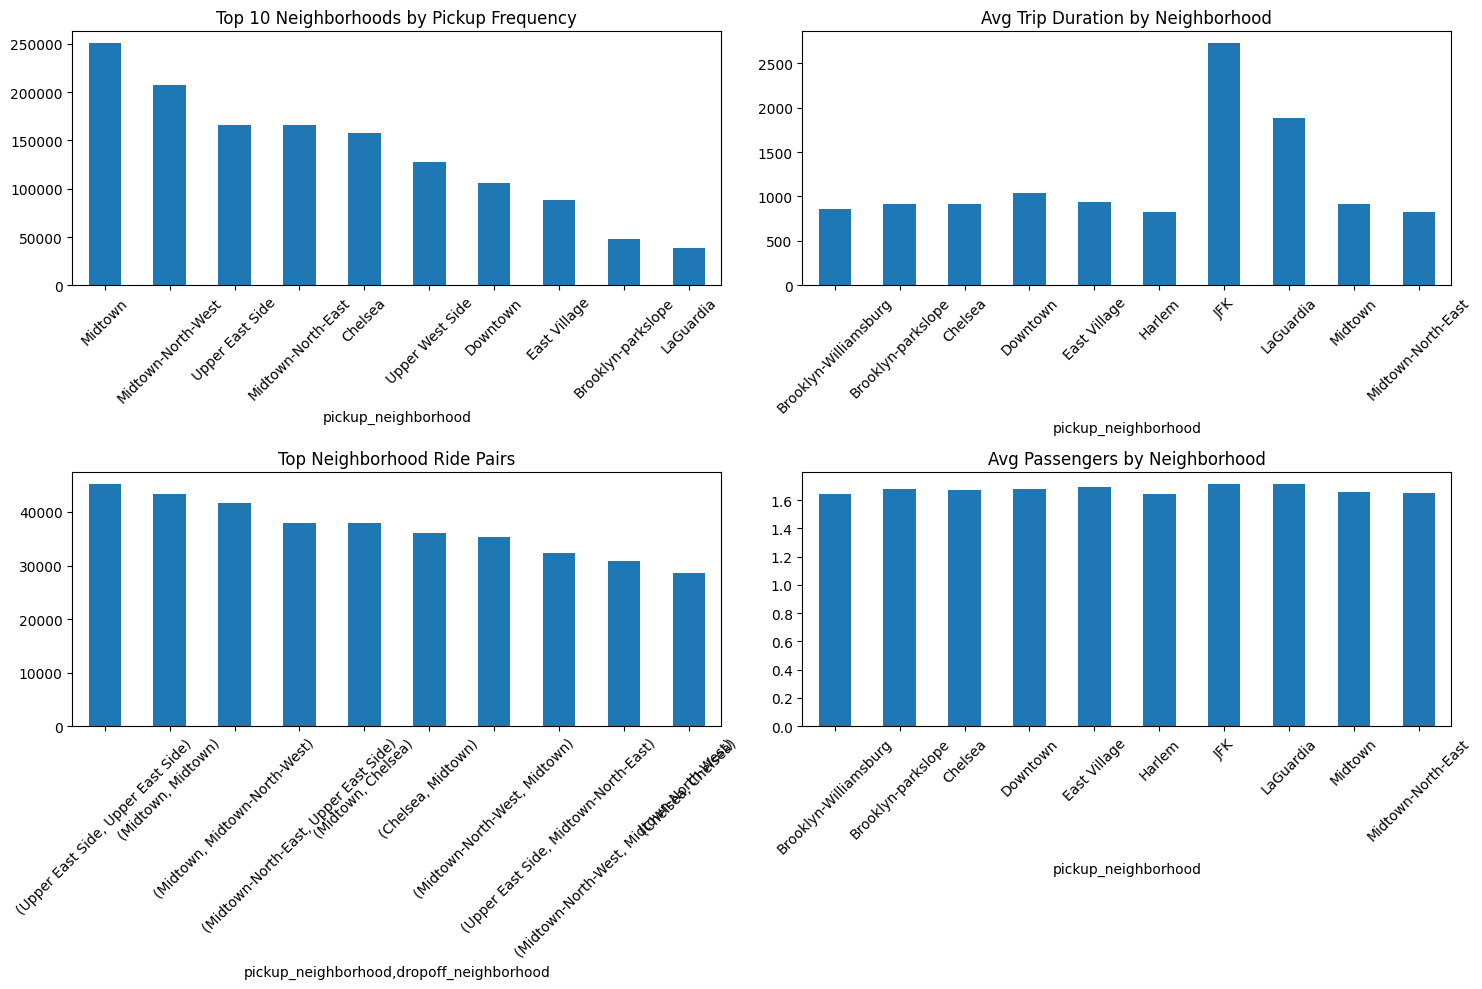

In [6]:
neighborhood_dict = create_neighborhood_mapping()
neighborhood_advanced_analysis(df, neighborhood_dict)

In [ ]:
location_density_analysis(df)

**Heat Map**

In [9]:
total_df = assign_neighborhoods(df, neighborhood_dict)
rides_df = create_neighborhood_interaction_heatmap(total_df, neighborhood_dict)

In [ ]:
"""
Complete Observations from the Heatmap:

1. **High-Demand Hubs**:
   - **Midtown**:
     - Midtown has the highest number of both pickups and drop-offs, as indicated by the bright red cells on its row and column. This highlights Midtown as a major hub for ride activity.
     - Common destinations from Midtown include **Downtown**, **LaGuardia**, and **East Village**.
   - **Downtown**:
     - Downtown is another area with significant ride activity, often interacting with Midtown, East Village, and Chelsea.

2. **Airport Traffic**:
   - **JFK Airport**:
     - High interaction with neighborhoods like **Midtown**, **Downtown**, and **LaGuardia**, as expected for an airport serving as a major entry/exit point.
     - Sparse connections with residential neighborhoods like **Harlem** and **Upper West Side**.
   - **LaGuardia**:
     - Frequent connections to **Midtown** and **Downtown**. These areas are likely to have business travelers or visitors heading into the city.

3. **Neighborhood Interactions**:
   - **Intraneighborhood Rides**:
     - Diagonal cells like `Midtown` to `Midtown` or `Downtown` to `Downtown` have higher values, indicating that people often take short-distance rides within the same neighborhood.
   - **Midtown-to-Downtown**:
     - This pair shows strong interaction, signifying a high volume of rides between these business and commercial districts.

4. **Sparse Traffic Areas**:
   - **Harlem**:
     - Harlem shows low interaction with most neighborhoods, particularly with distant areas like JFK and Brooklyn-Williamsburg.
     - Most traffic in Harlem seems to be local or limited to neighboring districts like the Upper East Side.
   - **Brooklyn-Williamsburg** and **Brooklyn-Park Slope**:
     - These neighborhoods show relatively lower interaction with Manhattan neighborhoods, except for areas like Midtown or Downtown.
   - **Upper West Side** and **Upper East Side**:
     - These areas show sparse traffic except for connections with Midtown and Downtown.

5. **Chelsea**:
   - Chelsea has a notable number of rides, but its interaction is mostly with **Downtown**, **Midtown**, and **JFK**. Traffic with outer neighborhoods like Queens and Harlem is minimal.

6. **Regional Clustering**:
   - Manhattan neighborhoods (e.g., Midtown, Downtown, East Village) tend to have higher intra-Manhattan ride volumes compared to interactions with neighborhoods in Queens or Brooklyn.
   - **Queens** and **Astoria** show high interaction with JFK and LaGuardia, but low interaction with Brooklyn neighborhoods.

7. **Long-Distance Rides**:
   - Long-distance rides, such as from JFK or LaGuardia to neighborhoods like Harlem or Brooklyn-Williamsburg, appear relatively rare.
   - Most rides are concentrated within close geographical proximity, with a few exceptions for airport trips.

8. **Color Intensity Insights**:
   - The heatmap’s color bar reveals that most cells fall in the lower range of interactions (dark blue), suggesting a small number of rides between most neighborhood pairs.
   - Only a few cells, such as those involving Midtown, Downtown, and the airports, stand out with bright red, signaling high activity.

### Summary Insights:
- **Midtown as a Transportation Hub**:
  Midtown is the central node for ride activity, reflecting its role as a commercial, business, and tourist center.
- **Airport Connectivity**:
  Both JFK and LaGuardia airports show strong connections to Midtown and Downtown, supporting their role as gateways to the city.
- **Localized Patterns**:
  Many neighborhoods exhibit highly localized traffic, with sparse connections to distant areas.
- **Opportunity Areas**:
  The relatively low interaction between peripheral neighborhoods (e.g., Harlem to Brooklyn-Williamsburg) might indicate an underserved market or lack of demand.

This detailed analysis can help transportation services or urban planners optimize resource allocation, improve routing efficiency, or identify areas for new services. Let me know if you'd like further observations or refinements!

"""

"\nComplete Observations from the Heatmap:\n\n1. **High-Demand Hubs**:\n   - **Midtown**:\n     - Midtown has the highest number of both pickups and drop-offs, as indicated by the bright red cells on its row and column. This highlights Midtown as a major hub for ride activity.\n     - Common destinations from Midtown include **Downtown**, **LaGuardia**, and **East Village**.\n   - **Downtown**:\n     - Downtown is another area with significant ride activity, often interacting with Midtown, East Village, and Chelsea.\n\n2. **Airport Traffic**:\n   - **JFK Airport**:\n     - High interaction with neighborhoods like **Midtown**, **Downtown**, and **LaGuardia**, as expected for an airport serving as a major entry/exit point.\n     - Sparse connections with residential neighborhoods like **Harlem** and **Upper West Side**.\n   - **LaGuardia**:\n     - Frequent connections to **Midtown** and **Downtown**. These areas are likely to have business travelers or visitors heading into the city.\n\

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\1312825004.py:149: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



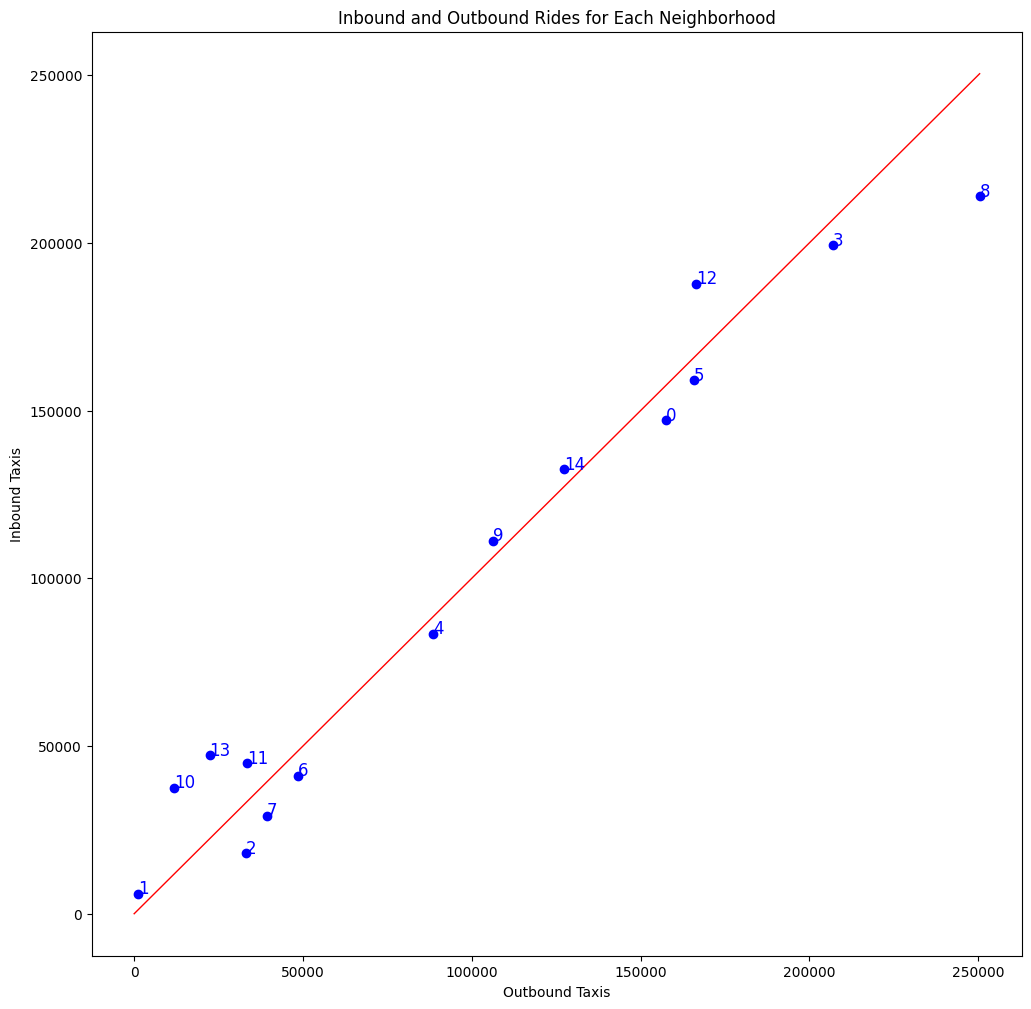

In [ ]:
plot_inbound_outbound_rides(rides_df)

K-Means Clustering with Display Output

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KMeans was fitted without feature names

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\3202802900.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KMeans was fitted without feature names

C:\Users\karis\AppData\Local\Temp\ipykernel_28104\3202802900.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\karis\AppDa


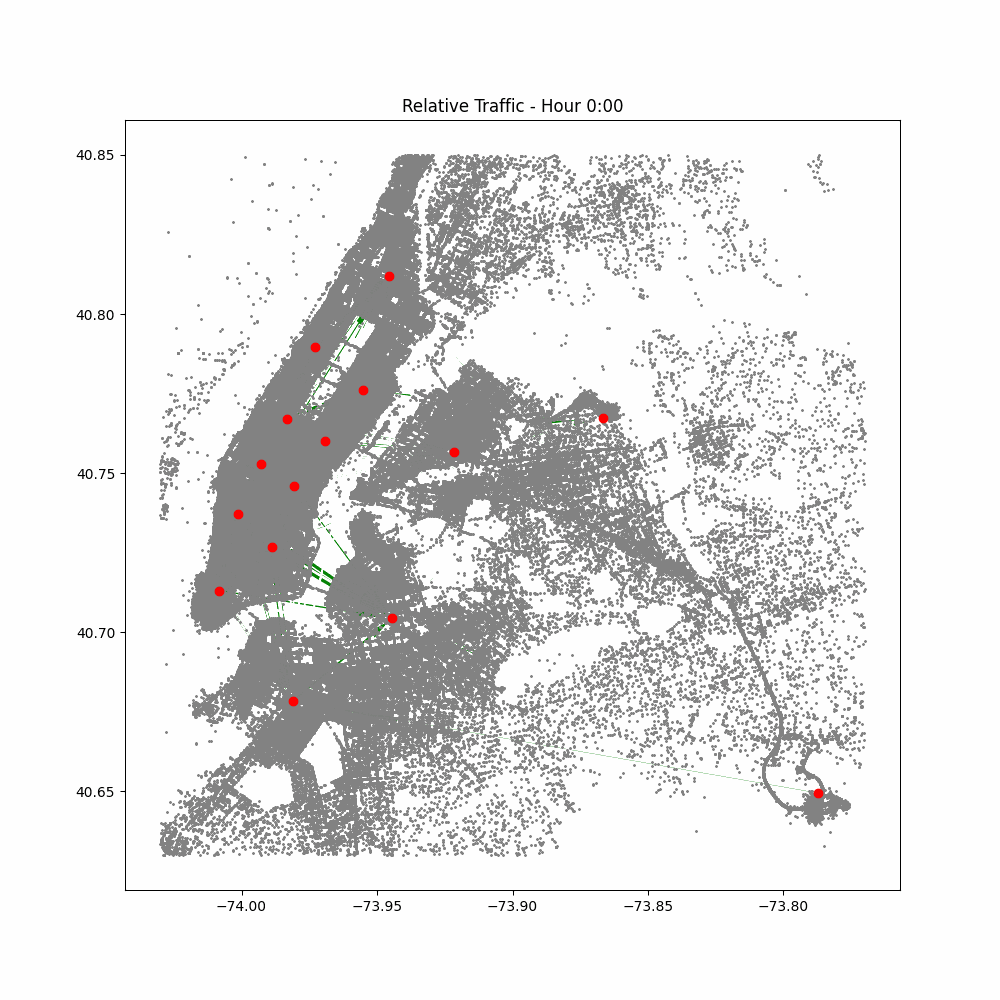

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Arrow
import base64
from IPython.display import HTML

def prepare_traffic_visualization(total_df, xlim=[-74.03, -73.77], ylim=[40.63, 40.85], n_clusters=15):
    # Filter DataFrame
    filtered_df = total_df[
        (total_df.pickup_longitude > xlim[0]) & (total_df.pickup_longitude < xlim[1]) &
        (total_df.dropoff_longitude > xlim[0]) & (total_df.dropoff_longitude < xlim[1]) &
        (total_df.pickup_latitude > ylim[0]) & (total_df.pickup_latitude < ylim[1]) &
        (total_df.dropoff_latitude > ylim[0]) & (total_df.dropoff_latitude < ylim[1])
    ]

    # Prepare location data for clustering
    loc_data = np.column_stack([
        filtered_df.pickup_longitude.tolist() + filtered_df.dropoff_longitude.tolist(),
        filtered_df.pickup_latitude.tolist() + filtered_df.dropoff_latitude.tolist()
    ])

    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=2, n_init=10)
    kmeans.fit(loc_data)

    # Add cluster labels to DataFrame
    filtered_df['pickup_cluster'] = kmeans.predict(filtered_df[['pickup_longitude', 'pickup_latitude']])
    filtered_df['dropoff_cluster'] = kmeans.predict(filtered_df[['dropoff_longitude', 'dropoff_latitude']])

    filtered_df['pickup_hour'] = pd.to_datetime(filtered_df.pickup_datetime).dt.hour
    loc_df = pd.DataFrame({
        'longitude': filtered_df.pickup_longitude.tolist() + filtered_df.dropoff_longitude.tolist(),
        'latitude': filtered_df.pickup_latitude.tolist() + filtered_df.dropoff_latitude.tolist(),
        'label': kmeans.labels_
    })

    # Create clusters DataFrame
    clusters = pd.DataFrame({
        'x': kmeans.cluster_centers_[:, 0],
        'y': kmeans.cluster_centers_[:, 1],
        'label': range(len(kmeans.cluster_centers_))
    })

    return filtered_df, loc_df, kmeans, clusters

def create_traffic_animation(total_df, loc_df, kmeans, clusters):

    fig, ax = plt.subplots(figsize=(10, 10))

    def animate(hour):
        ax.clear()
        ax.set_title('Relative Traffic - Hour ' + str(int(hour)) + ':00')

        # Plot clustered locations
        for label in loc_df.label.unique():
            ax.plot(
                loc_df.longitude[loc_df.label == label],
                loc_df.latitude[loc_df.label == label],
                '.',
                alpha=1,
                markersize=2,
                color='gray'
            )
            ax.plot(
                kmeans.cluster_centers_[label, 0],
                kmeans.cluster_centers_[label, 1],
                'o',
                color='r'
            )

        # Draw traffic arrows between clusters
        for label in clusters.label:
            for dest_label in clusters.label:
                num_of_rides = len(total_df[
                    (total_df.pickup_cluster == label) &
                    (total_df.dropoff_cluster == dest_label) &
                    (total_df.pickup_hour == hour)
                ])

                if num_of_rides > 0:
                    dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
                    dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]

                    pct = np.true_divide(num_of_rides, len(total_df[total_df.pickup_hour == hour]))

                    arr = Arrow(
                        clusters.x[clusters.label == label].values[0],
                        clusters.y[clusters.label == label].values[0],
                        -dist_x, -dist_y,
                        edgecolor='white',
                        width=pct
                    )
                    ax.add_patch(arr)
                    arr.set_facecolor('g')

    hours = sorted(total_df.pickup_hour.unique())
    ani = animation.FuncAnimation(fig, animate, hours, interval=1000)
    ani.save('animation.gif', writer='imagemagick', fps=2)
    plt.close(fig)

    return 'animation.gif'

def display_gif(filename):
    with open(filename, 'rb') as video_file:
        video = video_file.read()
    encoded = base64.b64encode(video)
    return HTML(f'<img src="data:image/gif;base64,{encoded.decode("ascii")}" type="gif" />')

total_df, loc_df, kmeans, clusters = prepare_traffic_visualization(total_df)
gif_filename = create_traffic_animation(total_df, loc_df, kmeans, clusters)
display_gif(gif_filename)

### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class.
* (5 points) Participate in peer review process.

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. **Points may be taken away if presentation exceeds 10 mins.**



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you.


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
